## 0. Chapter 0

    0.1 Import
    0.2 Read CSVs
    0.3 Functions
        0.3.1 nan_volumetry
        0.3.2 merge_data_dict
        0.3.3 best_skew_method
        0.3.4 check_skew
        
## 1. Analyze

    1.1 General
        1.1.1 shape - nunique - duplicated - describe
        1.1.2 NaN values        
    1.2 Customers
        1.2.1 customers state distribution
        1.2.2 groupby customer_unique_id
    1.3 Geolocation
        1.3.1 geopandas        
    1.4 Orders
        1.4.1 order_status distribution
    1.5 Order_items
        1.5.1 order_item_id distribution
        1.5.2 price distribution
        1.5.3 freight_value distribution
        1.5.4 new feature : price_freight / drop : 'price' - 'freight_value'
    1.6 Order_payments
        1.6.1 payment_type distribution
        1.6.2 payment_value distribution
        1.6.3 payment_sequential distribution
        1.6.4 groupby order_id to have one unique payment
    1.7 Order_reviews
        1.7.1 review_score distribution
        1.7.2 drop : 'review_comment_title' - 'review_comment_message'
    1.8 Products
        1.8.1 new feature : product_volume_cm^3
        1.8.2 drop : 'product_width_cm' - 'product_height_cm' - 'product_length_cm'
        1.8.3 drop : 'product_photos_qty' - 'product_description_lenght' - 'product_name_lenght'
    1.9 Sellers
        1.9.1 seller_state distribution

## 2. Merge

    2.1 Check commons features    
    2.2 Merge datasets    
    2.3 New DataFrame : df

## 3. Analyze df

    3.1 Date time    
    3.2 Duplicated - shape - nunique - describe - info - nan_volumetry    
    3.3 Groupby
        3.3.1 groupby 'customer_unique_id'.sum() / 'order_item_id' distribution
        3.3.2 groupby 'customer_unique_id'.count() / 'order_id' distribution
    3.4 NaN values
        3.4.1 Order_delivered_customer_date    
        3.4.2 Order_approved_at
        3.4.3 Product_cetegory_name(_english)
        3.4.4 product volume & weight
    3.5 New features
    
## 4. Groupby DataFrames

    4.1 Recency
    4.2 Frequency
    4.3 Monetary
    4.4 Monetary_mean
    4.5 Item_sum
    4.6 Item_mean
    4.7 Score_mean
   
## 5. RFM
    
    5.1 RFM DataFrame
    5.2 Skew & StandardScaler
 
## 6. Second DataFrame for clustering

    6.1 Clustering DataFrame
    6.2 Skew & StandardScaler

## 7. Save DataFrames

## 0. Chapter 0

### 0.1 Import

In [1]:
import pandas as pd
import matplotlib.pyplot as plt
import numpy as np
import math
import os
import glob
import geopandas
import seaborn as sns
import datetime as dt 
import re
from IPython.display import Image
from itertools import combinations
from sklearn.preprocessing import StandardScaler
from sklearn.decomposition import PCA
from sklearn.preprocessing import StandardScaler
from scipy import stats
from itertools import combinations

import warnings
warnings.filterwarnings('ignore')
warnings.simplefilter('ignore')

### 0.2 Read CSVs



customers : 


,customer_id,customer_unique_id,customer_zip_code_prefix,customer_city,customer_state
0,06b8999e2fba1a1fbc88172c00ba8bc7,861eff4711a542e4b93843c6dd7febb0,14409,franca,SP
1,18955e83d337fd6b2def6b18a428ac77,290c77bc529b7ac935b93aa66c333dc3,9790,sao bernardo do campo,SP
2,4e7b3e00288586ebd08712fdd0374a03,060e732b5b29e8181a18229c7b0b2b5e,1151,sao paulo,SP
3,b2b6027bc5c5109e529d4dc6358b12c3,259dac757896d24d7702b9acbbff3f3c,8775,mogi das cruzes,SP
4,4f2d8ab171c80ec8364f7c12e35b23ad,345ecd01c38d18a9036ed96c73b8d066,13056,campinas,SP
...,...,...,...,...,...
99436,17ddf5dd5d51696bb3d7c6291687be6f,1a29b476fee25c95fbafc67c5ac95cf8,3937,sao paulo,SP
99437,e7b71a9017aa05c9a7fd292d714858e8,d52a67c98be1cf6a5c84435bd38d095d,6764,taboao da serra,SP
99438,5e28dfe12db7fb50a4b2f691faecea5e,e9f50caf99f032f0bf3c55141f019d99,60115,fortaleza,CE
99439,56b18e2166679b8a959d72dd06da27f9,73c2643a0a458b49f58cea58833b192e,92120,canoas,RS




____________________________________________________________________________________________________
____________________________________________________________________________________________________




geolocation : 


,geolocation_zip_code_prefix,geolocation_lat,geolocation_lng,geolocation_city,geolocation_state
0,1037,-23.545621,-46.639292,sao paulo,SP
1,1046,-23.546081,-46.644820,sao paulo,SP
2,1046,-23.546129,-46.642951,sao paulo,SP
3,1041,-23.544392,-46.639499,sao paulo,SP
4,1035,-23.541578,-46.641607,sao paulo,SP
...,...,...,...,...,...
1000158,99950,-28.068639,-52.010705,tapejara,RS
1000159,99900,-27.877125,-52.224882,getulio vargas,RS
1000160,99950,-28.071855,-52.014716,tapejara,RS
1000161,99980,-28.388932,-51.846871,david canabarro,RS




____________________________________________________________________________________________________
____________________________________________________________________________________________________




orders : 


,order_id,customer_id,order_status,order_purchase_timestamp,order_approved_at,order_delivered_carrier_date,order_delivered_customer_date,order_estimated_delivery_date
0,e481f51cbdc54678b7cc49136f2d6af7,9ef432eb6251297304e76186b10a928d,delivered,2017-10-02 10:56:33,2017-10-02 11:07:15,2017-10-04 19:55:00,2017-10-10 21:25:13,2017-10-18 00:00:00
1,53cdb2fc8bc7dce0b6741e2150273451,b0830fb4747a6c6d20dea0b8c802d7ef,delivered,2018-07-24 20:41:37,2018-07-26 03:24:27,2018-07-26 14:31:00,2018-08-07 15:27:45,2018-08-13 00:00:00
2,47770eb9100c2d0c44946d9cf07ec65d,41ce2a54c0b03bf3443c3d931a367089,delivered,2018-08-08 08:38:49,2018-08-08 08:55:23,2018-08-08 13:50:00,2018-08-17 18:06:29,2018-09-04 00:00:00
3,949d5b44dbf5de918fe9c16f97b45f8a,f88197465ea7920adcdbec7375364d82,delivered,2017-11-18 19:28:06,2017-11-18 19:45:59,2017-11-22 13:39:59,2017-12-02 00:28:42,2017-12-15 00:00:00
4,ad21c59c0840e6cb83a9ceb5573f8159,8ab97904e6daea8866dbdbc4fb7aad2c,delivered,2018-02-13 21:18:39,2018-02-13 22:20:29,2018-02-14 19:46:34,2018-02-16 18:17:02,2018-02-26 00:00:00
...,...,...,...,...,...,...,...,...
99436,9c5dedf39a927c1b2549525ed64a053c,39bd1228ee8140590ac3aca26f2dfe00,delivered,2017-03-09 09:54:05,2017-03-09 09:54:05,2017-03-10 11:18:03,2017-03-17 15:08:01,2017-03-28 00:00:00
99437,63943bddc261676b46f01ca7ac2f7bd8,1fca14ff2861355f6e5f14306ff977a7,delivered,2018-02-06 12:58:58,2018-02-06 13:10:37,2018-02-07 23:22:42,2018-02-28 17:37:56,2018-03-02 00:00:00
99438,83c1379a015df1e13d02aae0204711ab,1aa71eb042121263aafbe80c1b562c9c,delivered,2017-08-27 14:46:43,2017-08-27 15:04:16,2017-08-28 20:52:26,2017-09-21 11:24:17,2017-09-27 00:00:00
99439,11c177c8e97725db2631073c19f07b62,b331b74b18dc79bcdf6532d51e1637c1,delivered,2018-01-08 21:28:27,2018-01-08 21:36:21,2018-01-12 15:35:03,2018-01-25 23:32:54,2018-02-15 00:00:00




____________________________________________________________________________________________________
____________________________________________________________________________________________________




order_items : 


,order_id,order_item_id,product_id,seller_id,shipping_limit_date,price,freight_value
0,00010242fe8c5a6d1ba2dd792cb16214,1,4244733e06e7ecb4970a6e2683c13e61,48436dade18ac8b2bce089ec2a041202,2017-09-19 09:45:35,58.90,13.29
1,00018f77f2f0320c557190d7a144bdd3,1,e5f2d52b802189ee658865ca93d83a8f,dd7ddc04e1b6c2c614352b383efe2d36,2017-05-03 11:05:13,239.90,19.93
2,000229ec398224ef6ca0657da4fc703e,1,c777355d18b72b67abbeef9df44fd0fd,5b51032eddd242adc84c38acab88f23d,2018-01-18 14:48:30,199.00,17.87
3,00024acbcdf0a6daa1e931b038114c75,1,7634da152a4610f1595efa32f14722fc,9d7a1d34a5052409006425275ba1c2b4,2018-08-15 10:10:18,12.99,12.79
4,00042b26cf59d7ce69dfabb4e55b4fd9,1,ac6c3623068f30de03045865e4e10089,df560393f3a51e74553ab94004ba5c87,2017-02-13 13:57:51,199.90,18.14
...,...,...,...,...,...,...,...
112645,fffc94f6ce00a00581880bf54a75a037,1,4aa6014eceb682077f9dc4bffebc05b0,b8bc237ba3788b23da09c0f1f3a3288c,2018-05-02 04:11:01,299.99,43.41
112646,fffcd46ef2263f404302a634eb57f7eb,1,32e07fd915822b0765e448c4dd74c828,f3c38ab652836d21de61fb8314b69182,2018-07-20 04:31:48,350.00,36.53
112647,fffce4705a9662cd70adb13d4a31832d,1,72a30483855e2eafc67aee5dc2560482,c3cfdc648177fdbbbb35635a37472c53,2017-10-30 17:14:25,99.90,16.95
112648,fffe18544ffabc95dfada21779c9644f,1,9c422a519119dcad7575db5af1ba540e,2b3e4a2a3ea8e01938cabda2a3e5cc79,2017-08-21 00:04:32,55.99,8.72




____________________________________________________________________________________________________
____________________________________________________________________________________________________




order_payments : 


,order_id,payment_sequential,payment_type,payment_installments,payment_value
0,b81ef226f3fe1789b1e8b2acac839d17,1,credit_card,8,99.33
1,a9810da82917af2d9aefd1278f1dcfa0,1,credit_card,1,24.39
2,25e8ea4e93396b6fa0d3dd708e76c1bd,1,credit_card,1,65.71
3,ba78997921bbcdc1373bb41e913ab953,1,credit_card,8,107.78
4,42fdf880ba16b47b59251dd489d4441a,1,credit_card,2,128.45
...,...,...,...,...,...
103881,0406037ad97740d563a178ecc7a2075c,1,boleto,1,363.31
103882,7b905861d7c825891d6347454ea7863f,1,credit_card,2,96.80
103883,32609bbb3dd69b3c066a6860554a77bf,1,credit_card,1,47.77
103884,b8b61059626efa996a60be9bb9320e10,1,credit_card,5,369.54




____________________________________________________________________________________________________
____________________________________________________________________________________________________




order_reviews : 


,review_id,order_id,review_score,review_comment_title,review_comment_message,review_creation_date,review_answer_timestamp
0,7bc2406110b926393aa56f80a40eba40,73fc7af87114b39712e6da79b0a377eb,4,NaN,NaN,2018-01-18 00:00:00,2018-01-18 21:46:59
1,80e641a11e56f04c1ad469d5645fdfde,a548910a1c6147796b98fdf73dbeba33,5,NaN,NaN,2018-03-10 00:00:00,2018-03-11 03:05:13
2,228ce5500dc1d8e020d8d1322874b6f0,f9e4b658b201a9f2ecdecbb34bed034b,5,NaN,NaN,2018-02-17 00:00:00,2018-02-18 14:36:24
3,e64fb393e7b32834bb789ff8bb30750e,658677c97b385a9be170737859d3511b,5,NaN,Recebi bem antes do prazo estipulado.,2017-04-21 00:00:00,2017-04-21 22:02:06
4,f7c4243c7fe1938f181bec41a392bdeb,8e6bfb81e283fa7e4f11123a3fb894f1,5,NaN,Parabéns lojas lannister adorei comprar pela I...,2018-03-01 00:00:00,2018-03-02 10:26:53
...,...,...,...,...,...,...,...
99219,574ed12dd733e5fa530cfd4bbf39d7c9,2a8c23fee101d4d5662fa670396eb8da,5,NaN,NaN,2018-07-07 00:00:00,2018-07-14 17:18:30
99220,f3897127253a9592a73be9bdfdf4ed7a,22ec9f0669f784db00fa86d035cf8602,5,NaN,NaN,2017-12-09 00:00:00,2017-12-11 20:06:42
99221,b3de70c89b1510c4cd3d0649fd302472,55d4004744368f5571d1f590031933e4,5,NaN,"Excelente mochila, entrega super rápida. Super...",2018-03-22 00:00:00,2018-03-23 09:10:43
99222,1adeb9d84d72fe4e337617733eb85149,7725825d039fc1f0ceb7635e3f7d9206,4,NaN,NaN,2018-07-01 00:00:00,2018-07-02 12:59:13




____________________________________________________________________________________________________
____________________________________________________________________________________________________




products : 


,product_id,product_category_name,product_name_lenght,product_description_lenght,product_photos_qty,product_weight_g,product_length_cm,product_height_cm,product_width_cm
0,1e9e8ef04dbcff4541ed26657ea517e5,perfumaria,40.0,287.0,1.0,225.0,16.0,10.0,14.0
1,3aa071139cb16b67ca9e5dea641aaa2f,artes,44.0,276.0,1.0,1000.0,30.0,18.0,20.0
2,96bd76ec8810374ed1b65e291975717f,esporte_lazer,46.0,250.0,1.0,154.0,18.0,9.0,15.0
3,cef67bcfe19066a932b7673e239eb23d,bebes,27.0,261.0,1.0,371.0,26.0,4.0,26.0
4,9dc1a7de274444849c219cff195d0b71,utilidades_domesticas,37.0,402.0,4.0,625.0,20.0,17.0,13.0
...,...,...,...,...,...,...,...,...,...
32946,a0b7d5a992ccda646f2d34e418fff5a0,moveis_decoracao,45.0,67.0,2.0,12300.0,40.0,40.0,40.0
32947,bf4538d88321d0fd4412a93c974510e6,construcao_ferramentas_iluminacao,41.0,971.0,1.0,1700.0,16.0,19.0,16.0
32948,9a7c6041fa9592d9d9ef6cfe62a71f8c,cama_mesa_banho,50.0,799.0,1.0,1400.0,27.0,7.0,27.0
32949,83808703fc0706a22e264b9d75f04a2e,informatica_acessorios,60.0,156.0,2.0,700.0,31.0,13.0,20.0




____________________________________________________________________________________________________
____________________________________________________________________________________________________




sellers : 


,seller_id,seller_zip_code_prefix,seller_city,seller_state
0,3442f8959a84dea7ee197c632cb2df15,13023,campinas,SP
1,d1b65fc7debc3361ea86b5f14c68d2e2,13844,mogi guacu,SP
2,ce3ad9de960102d0677a81f5d0bb7b2d,20031,rio de janeiro,RJ
3,c0f3eea2e14555b6faeea3dd58c1b1c3,4195,sao paulo,SP
4,51a04a8a6bdcb23deccc82b0b80742cf,12914,braganca paulista,SP
...,...,...,...,...
3090,98dddbc4601dd4443ca174359b237166,87111,sarandi,PR
3091,f8201cab383e484733266d1906e2fdfa,88137,palhoca,SC
3092,74871d19219c7d518d0090283e03c137,4650,sao paulo,SP
3093,e603cf3fec55f8697c9059638d6c8eb5,96080,pelotas,RS




____________________________________________________________________________________________________
____________________________________________________________________________________________________




product_category_name_translation : 


,product_category_name,product_category_name_english
0,beleza_saude,health_beauty
1,informatica_acessorios,computers_accessories
2,automotivo,auto
3,cama_mesa_banho,bed_bath_table
4,moveis_decoracao,furniture_decor
...,...,...
66,flores,flowers
67,artes_e_artesanato,arts_and_craftmanship
68,fraldas_higiene,diapers_and_hygiene
69,fashion_roupa_infanto_juvenil,fashion_childrens_clothes




____________________________________________________________________________________________________
____________________________________________________________________________________________________




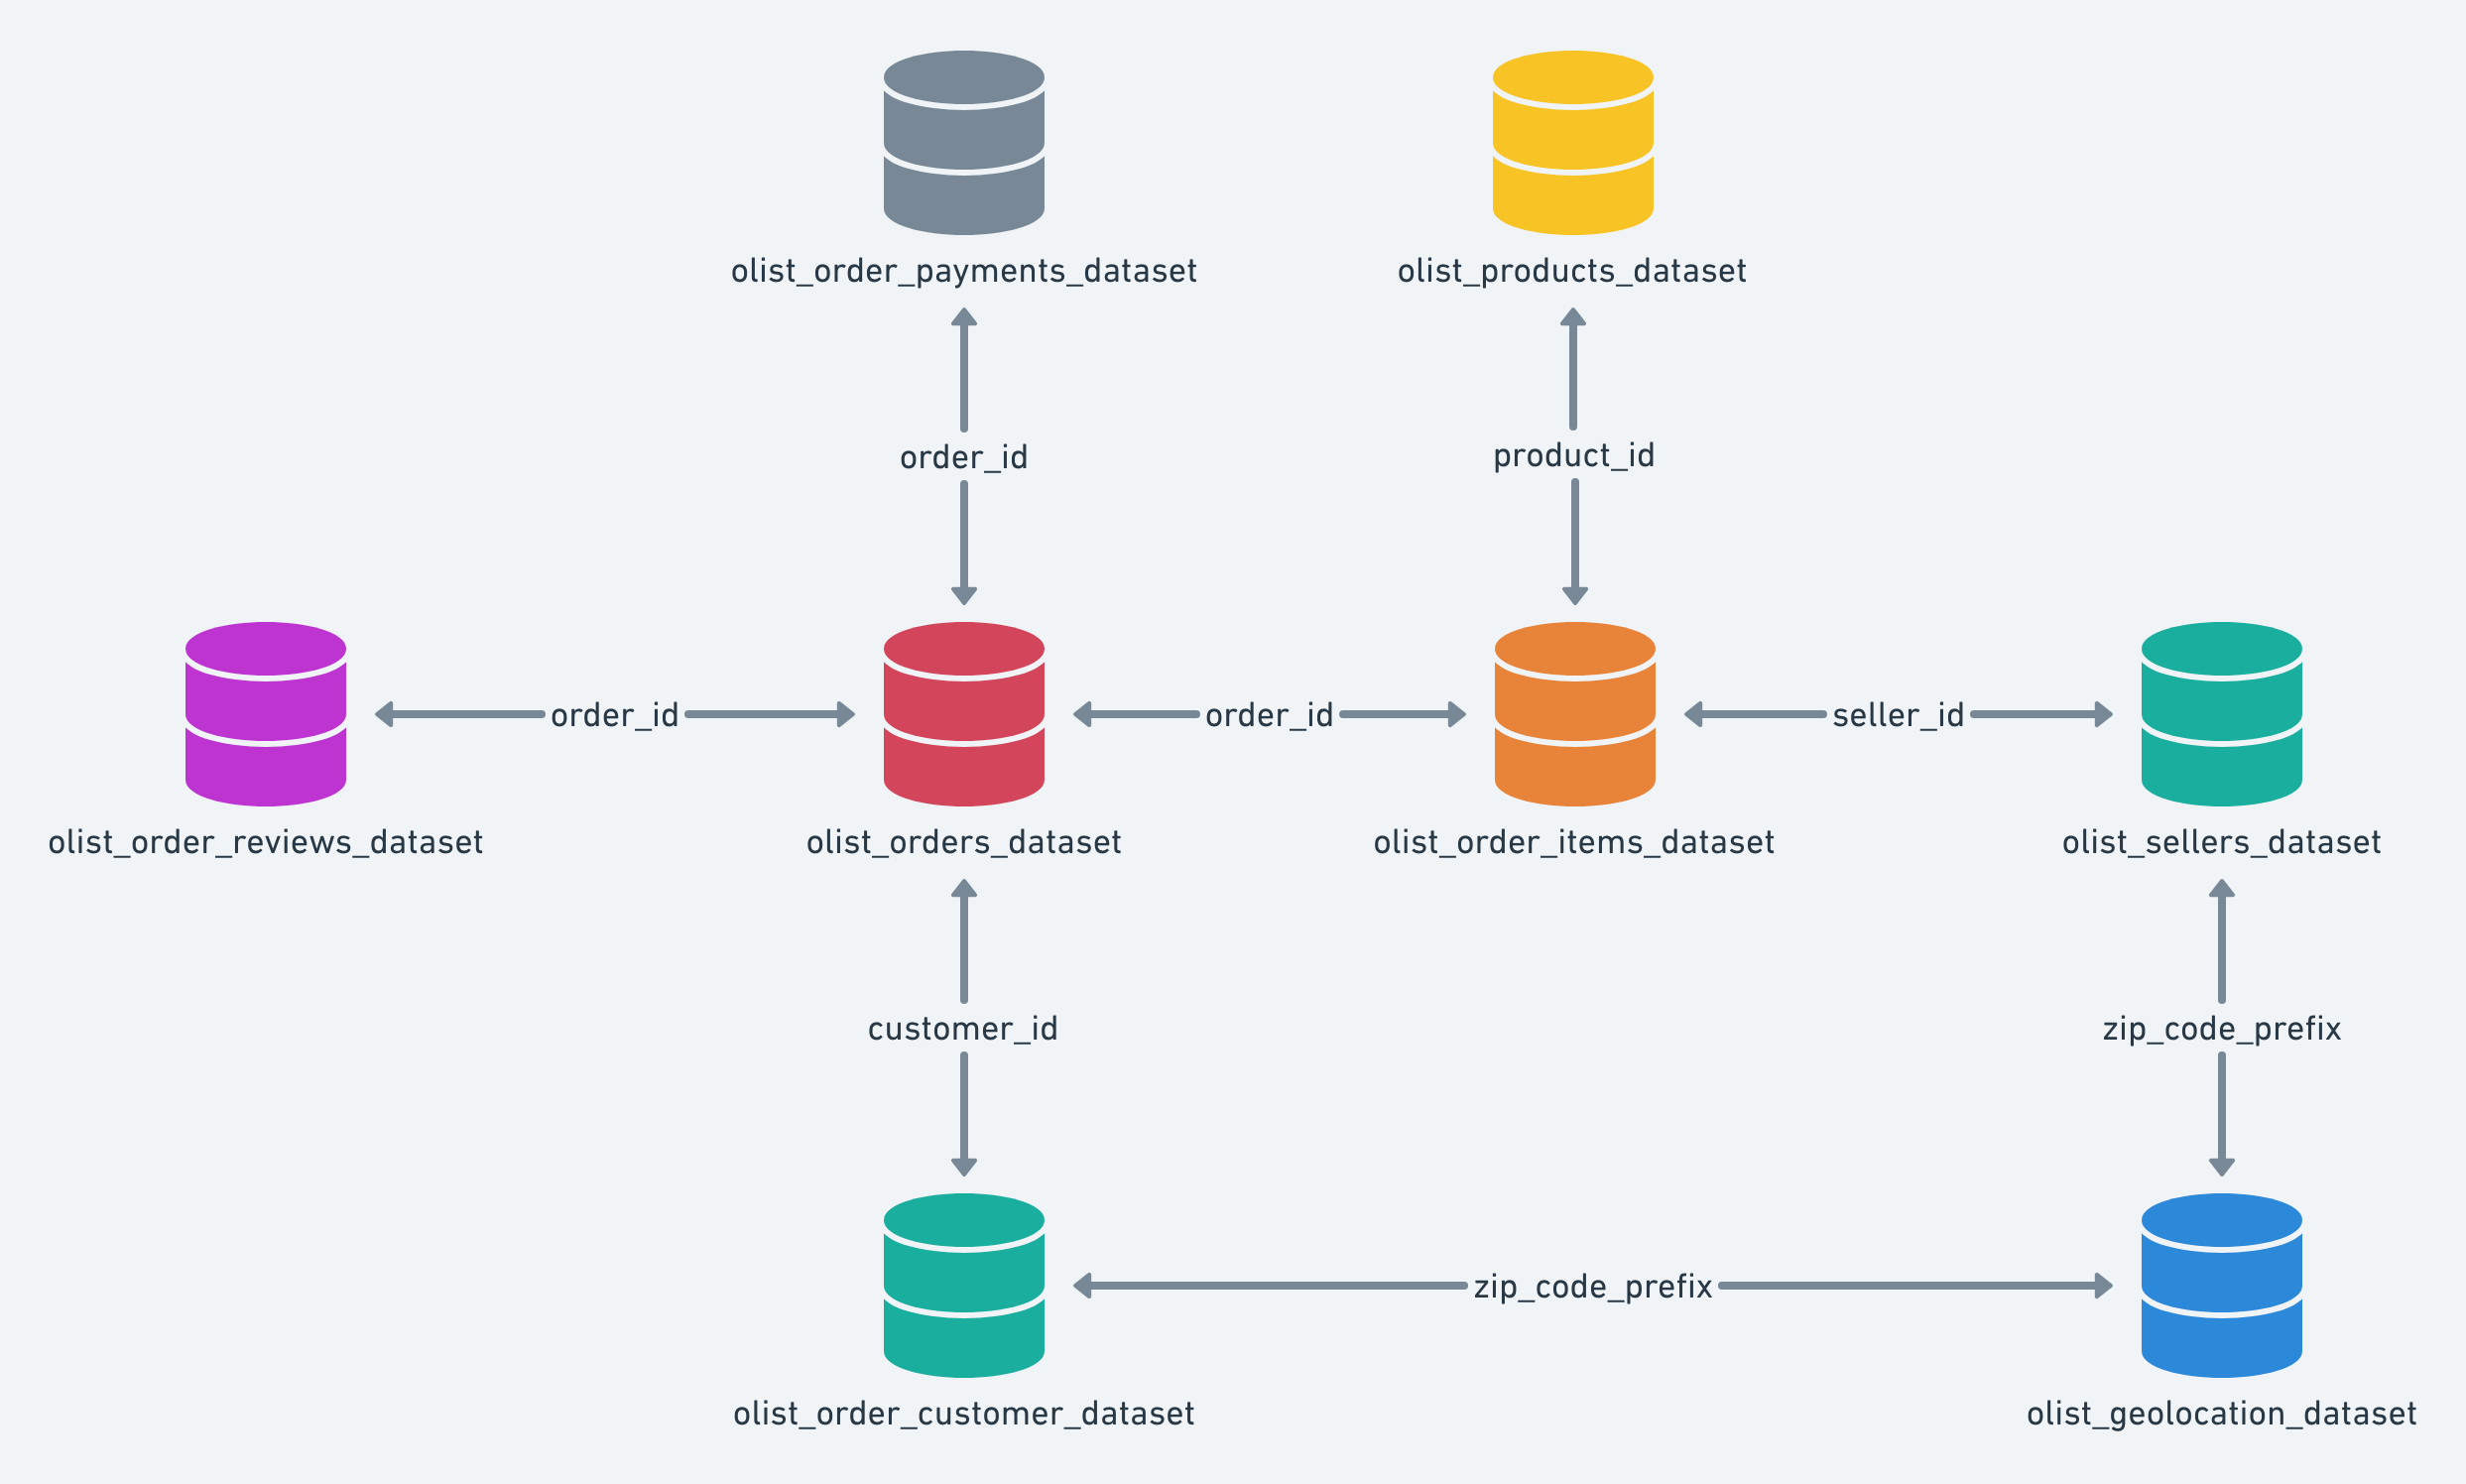

In [2]:
# collect DataFrame in a dictionary
# key : DataFrame's name
# value : DataFrame

separator_line = '\n\n'+'\033[1m_\033[0m'*100+'\n'+'\033[1m_\033[0m'*100+'\n\n'
data_dict={}

# get csv's paths
for file_csv in glob.glob(r"C:\Users\emanu\Documents\Projet_5\archive\*.csv"):
    file_csv = os.path.join("c:\\", file_csv)
    
    # from path extract the csv name
    start = r"C:\Users\emanu\Documents\Projet_5\archive"
    end = '.csv'
    file_key = ((file_csv.split(start))[1].split(end)[0])[1:]
    if 'olist' in file_key:
        file_key = ((file_key.split('olist'))[1].split('_dataset')[0])[1:]
    
    # save csv in data_dict
    data_dict[file_key] = pd.read_csv(file_csv) 
    
    # print
    print('\n\n\033[1m'+file_key+' :\033[0m ')
    display(data_dict[file_key])
    print(separator_line)
    

Image(filename=r"C:\Users\emanu\Documents\Projet_5\shema_de_jointure.png")

### 0.3 Functions

##### nan_volumetry

In [3]:
def nan_volumetry(df, title='NaN Volumetry'):
    """
    Plot a barh graph of NaN percentage values of every columns
    
    Parameters:
    df (pd.DataFrame): DataFrame of which we wont check NaN volumetry
    title (str): plt.title string
    
    Return:
    None
    
    """
    plt.rcParams["figure.figsize"] =(10,len(df.columns)/3)
    per_1 = (df.isna().mean().round(4) * 100).sort_values()
    f, ax = plt.subplots()
    for i,item in enumerate(zip(per_1.keys(),per_1.values)):
        ax.barh(item[0], item[1], label = item[0])
        ax.text(1.5,i-0.2, str(item[1])+'%')
    plt.title(title, fontsize=20)
    plt.xlim(0,100)
    plt.margins(0)
    plt.xlabel('Percentage')
    plt.ylabel('Columns')
    plt.grid(axis='x')
    plt.show()

##### merge_data_dict

In [4]:
def merge_data_dict(data_dict, left, right, on, how='inner'):
    """
    merge dataframes in data_dict and print the differents data.shape
    
    Parameters:
    data_dict (dict): dict whit pandas.DataFrames for values
    left (str): key name in data_dict of the left DataFrame to merge
    right (str): key name in data_dict of the right DataFrame to merge
    on (label or list): Column or index level names to join on.
    how {‘left’, ‘right’, ‘outer’, ‘inner’, ‘cross’} : Type of merge to be performed.
    
    
    Returns:
    data (pd.DataFrame): merged DataFrame
    
    """
    data = pd.merge(left = data_dict[left],
                    right = data_dict[right],
                    on = on,
                    how = how
                   )
    print("\nmerge_data_dict results :\n")
    print('left data : \033[1m'+ left +'\033[0m - shape : ', data_dict[left].shape)    
    print('right data : \033[1m'+ right +'\033[0m - shape : ', data_dict[right].shape)
    print('on : \033[1m'+ on +'\033[0m')
    print('how : \033[1m'+ how +'\033[0m')
    print('\nmerge data shape :', data.shape)
    if data.isna().sum().sum() != (data_dict[left].isna().sum().sum() + data_dict[right].isna().sum().sum()):
        nan_volumetry(data, title='data NaN Volumetry')
    print(separator_line)
    return data
    

In [5]:
def best_skew_method(df, columns):
    """
    Find the best method to improve the skew of the feature
    
    Parameters:
    - df (pd.DataFrame)
    - columns (list) : list of str contain the name of the NOT NEGATIVE of which we want test the skew
    
    Returns:
    skew_data (pd.DataFrame) :  DataFrame with the results of the differents methods    
    """
    skew_data = pd.DataFrame()
    skew_data['Features'] = columns
    skew_data['Original_skew'] = list(df[columns].skew())
    
    # Log
    skew_data['Log_skew'] = list(np.log(df[columns]).skew())
    
    # Square
    skew_data['SquareRoot_skew'] = list(np.sqrt(df[columns]).skew())
    
    #Cube
    skew_data['CubeRoot_skew'] = list(np.cbrt(df[columns]).skew())
    
    # Boxcox
    boxcox = []
    for col in columns:
        if (df[col]<0).sum()==0:
            boxcox.append(pd.Series(stats.boxcox(df[col])[0]).skew())
        else:
            boxcox.append(np.nan)
    skew_data['Boxcox_skew'] = boxcox
    return skew_data

In [6]:
def check_skew(df_skew, column):
    """
    show histplot of the feature & print skew and skewtest
    
    Parameters:
    - df_skew (pd.DataFrame)
    - column (str): name of the feature we want check the skew
    
    Returns:
    None
    """
    skew = stats.skew(df_skew[column])
    skewtest = stats.skewtest(df_skew[column])
    plt.figure(figsize=(5,5))
    plt.title('Distribution of ' + column)
    sns.histplot(data=df_skew, x=column, kde=True)
    print("\033[1m{} \033[0m\nSkew : {};\n{}".format(column, skew, skewtest))
    plt.show()
    plt.close('all')

## 1. Analyze

### 1.1 General

##### shape - nunique - duplicated - describe

In [7]:
separator_line = '\n\n'+'\033[1m_\033[0m'*100+'\n'+'\033[1m_\033[0m'*100+'\n\n'

for key, value in data_dict.items():
    print('\n\033[1m'+key+' : \033[0m' )
    
# duplicated
    print('\nduplicated_sum :',value.duplicated().sum())
    if value.duplicated().sum()!= 0:
        value.drop_duplicates(inplace=True)
        if value.duplicated().sum() == 0:
            print('\033[1mduplicates successfully dropped\033[0m')
            
# shape
    print('\nshape :', value.shape)

# nunique
    print('\nnunique :')
    print(value.nunique().sort_values())
    
# describe
    print('\n\ndescribe :')
    display(value.describe())
    
# info
    print('\ninfo :')
    print(value.info())
    
    print(separator_line)



customers : 

duplicated_sum : 0

shape : (99441, 5)

nunique :
customer_state                 27
customer_city                4119
customer_zip_code_prefix    14994
customer_unique_id          96096
customer_id                 99441
dtype: int64


describe :


,customer_zip_code_prefix
count,99441.000000
mean,35137.474583
std,29797.938996
min,1003.000000
25%,11347.000000
50%,24416.000000
75%,58900.000000
max,99990.000000



info :
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 99441 entries, 0 to 99440
Data columns (total 5 columns):
 #   Column                    Non-Null Count  Dtype 
---  ------                    --------------  ----- 
 0   customer_id               99441 non-null  object
 1   customer_unique_id        99441 non-null  object
 2   customer_zip_code_prefix  99441 non-null  int64 
 3   customer_city             99441 non-null  object
 4   customer_state            99441 non-null  object
dtypes: int64(1), object(4)
memory usage: 3.8+ MB
None


____________________________________________________________________________________________________
____________________________________________________________________________________________________



geolocation : 

duplicated_sum : 261831
duplicates successfully dropped

shape : (738332, 5)

nunique :
geolocation_state                  27
geolocation_city                 8011
geolocation_zip_code_prefix     19015
geolocation_lat           

,geolocation_zip_code_prefix,geolocation_lat,geolocation_lng
count,738332.000000,738332.000000,738332.000000
mean,38316.086800,-20.998353,-46.461098
std,30632.496675,5.892315,4.393705
min,1001.000000,-36.605374,-101.466766
25%,12600.000000,-23.603061,-48.867822
50%,29144.000000,-22.873588,-46.647278
75%,65950.000000,-19.923336,-43.836974
max,99990.000000,45.065933,121.105394



info :
<class 'pandas.core.frame.DataFrame'>
Int64Index: 738332 entries, 0 to 1000161
Data columns (total 5 columns):
 #   Column                       Non-Null Count   Dtype  
---  ------                       --------------   -----  
 0   geolocation_zip_code_prefix  738332 non-null  int64  
 1   geolocation_lat              738332 non-null  float64
 2   geolocation_lng              738332 non-null  float64
 3   geolocation_city             738332 non-null  object 
 4   geolocation_state            738332 non-null  object 
dtypes: float64(2), int64(1), object(2)
memory usage: 33.8+ MB
None


____________________________________________________________________________________________________
____________________________________________________________________________________________________



orders : 

duplicated_sum : 0

shape : (99441, 8)

nunique :
order_status                         8
order_estimated_delivery_date      459
order_delivered_carrier_date     81018
order_approved_

,order_id,customer_id,order_status,order_purchase_timestamp,order_approved_at,order_delivered_carrier_date,order_delivered_customer_date,order_estimated_delivery_date
count,99441,99441,99441,99441,99281,97658,96476,99441
unique,99441,99441,8,98875,90733,81018,95664,459
top,e481f51cbdc54678b7cc49136f2d6af7,9ef432eb6251297304e76186b10a928d,delivered,2018-04-11 10:48:14,2018-02-27 04:31:10,2018-05-09 15:48:00,2018-05-08 23:38:46,2017-12-20 00:00:00
freq,1,1,96478,3,9,47,3,522



info :
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 99441 entries, 0 to 99440
Data columns (total 8 columns):
 #   Column                         Non-Null Count  Dtype 
---  ------                         --------------  ----- 
 0   order_id                       99441 non-null  object
 1   customer_id                    99441 non-null  object
 2   order_status                   99441 non-null  object
 3   order_purchase_timestamp       99441 non-null  object
 4   order_approved_at              99281 non-null  object
 5   order_delivered_carrier_date   97658 non-null  object
 6   order_delivered_customer_date  96476 non-null  object
 7   order_estimated_delivery_date  99441 non-null  object
dtypes: object(8)
memory usage: 6.1+ MB
None


____________________________________________________________________________________________________
____________________________________________________________________________________________________



order_items : 

duplicated_sum : 0

shape 

,order_item_id,price,freight_value
count,112650.000000,112650.000000,112650.000000
mean,1.197834,120.653739,19.990320
std,0.705124,183.633928,15.806405
min,1.000000,0.850000,0.000000
25%,1.000000,39.900000,13.080000
50%,1.000000,74.990000,16.260000
75%,1.000000,134.900000,21.150000
max,21.000000,6735.000000,409.680000



info :
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 112650 entries, 0 to 112649
Data columns (total 7 columns):
 #   Column               Non-Null Count   Dtype  
---  ------               --------------   -----  
 0   order_id             112650 non-null  object 
 1   order_item_id        112650 non-null  int64  
 2   product_id           112650 non-null  object 
 3   seller_id            112650 non-null  object 
 4   shipping_limit_date  112650 non-null  object 
 5   price                112650 non-null  float64
 6   freight_value        112650 non-null  float64
dtypes: float64(2), int64(1), object(4)
memory usage: 6.0+ MB
None


____________________________________________________________________________________________________
____________________________________________________________________________________________________



order_payments : 

duplicated_sum : 0

shape : (103886, 5)

nunique :
payment_type                5
payment_installments       24
payment_sequential 

,payment_sequential,payment_installments,payment_value
count,103886.000000,103886.000000,103886.000000
mean,1.092679,2.853349,154.100380
std,0.706584,2.687051,217.494064
min,1.000000,0.000000,0.000000
25%,1.000000,1.000000,56.790000
50%,1.000000,1.000000,100.000000
75%,1.000000,4.000000,171.837500
max,29.000000,24.000000,13664.080000



info :
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 103886 entries, 0 to 103885
Data columns (total 5 columns):
 #   Column                Non-Null Count   Dtype  
---  ------                --------------   -----  
 0   order_id              103886 non-null  object 
 1   payment_sequential    103886 non-null  int64  
 2   payment_type          103886 non-null  object 
 3   payment_installments  103886 non-null  int64  
 4   payment_value         103886 non-null  float64
dtypes: float64(1), int64(2), object(2)
memory usage: 4.0+ MB
None


____________________________________________________________________________________________________
____________________________________________________________________________________________________



order_reviews : 

duplicated_sum : 0

shape : (99224, 7)

nunique :
review_score                   5
review_creation_date         636
review_comment_title        4527
review_comment_message     36159
review_answer_timestamp    98248
review_id  

,review_score
count,99224.000000
mean,4.086421
std,1.347579
min,1.000000
25%,4.000000
50%,5.000000
75%,5.000000
max,5.000000



info :
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 99224 entries, 0 to 99223
Data columns (total 7 columns):
 #   Column                   Non-Null Count  Dtype 
---  ------                   --------------  ----- 
 0   review_id                99224 non-null  object
 1   order_id                 99224 non-null  object
 2   review_score             99224 non-null  int64 
 3   review_comment_title     11568 non-null  object
 4   review_comment_message   40977 non-null  object
 5   review_creation_date     99224 non-null  object
 6   review_answer_timestamp  99224 non-null  object
dtypes: int64(1), object(6)
memory usage: 5.3+ MB
None


____________________________________________________________________________________________________
____________________________________________________________________________________________________



products : 

duplicated_sum : 0

shape : (32951, 9)

nunique :
product_photos_qty               19
product_name_lenght              66
product_ca

,product_name_lenght,product_description_lenght,product_photos_qty,product_weight_g,product_length_cm,product_height_cm,product_width_cm
count,32341.000000,32341.000000,32341.000000,32949.000000,32949.000000,32949.000000,32949.000000
mean,48.476949,771.495285,2.188986,2276.472488,30.815078,16.937661,23.196728
std,10.245741,635.115225,1.736766,4282.038731,16.914458,13.637554,12.079047
min,5.000000,4.000000,1.000000,0.000000,7.000000,2.000000,6.000000
25%,42.000000,339.000000,1.000000,300.000000,18.000000,8.000000,15.000000
50%,51.000000,595.000000,1.000000,700.000000,25.000000,13.000000,20.000000
75%,57.000000,972.000000,3.000000,1900.000000,38.000000,21.000000,30.000000
max,76.000000,3992.000000,20.000000,40425.000000,105.000000,105.000000,118.000000



info :
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 32951 entries, 0 to 32950
Data columns (total 9 columns):
 #   Column                      Non-Null Count  Dtype  
---  ------                      --------------  -----  
 0   product_id                  32951 non-null  object 
 1   product_category_name       32341 non-null  object 
 2   product_name_lenght         32341 non-null  float64
 3   product_description_lenght  32341 non-null  float64
 4   product_photos_qty          32341 non-null  float64
 5   product_weight_g            32949 non-null  float64
 6   product_length_cm           32949 non-null  float64
 7   product_height_cm           32949 non-null  float64
 8   product_width_cm            32949 non-null  float64
dtypes: float64(7), object(2)
memory usage: 2.3+ MB
None


____________________________________________________________________________________________________
_________________________________________________________________________________________________

,seller_zip_code_prefix
count,3095.000000
mean,32291.059451
std,32713.453830
min,1001.000000
25%,7093.500000
50%,14940.000000
75%,64552.500000
max,99730.000000



info :
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 3095 entries, 0 to 3094
Data columns (total 4 columns):
 #   Column                  Non-Null Count  Dtype 
---  ------                  --------------  ----- 
 0   seller_id               3095 non-null   object
 1   seller_zip_code_prefix  3095 non-null   int64 
 2   seller_city             3095 non-null   object
 3   seller_state            3095 non-null   object
dtypes: int64(1), object(3)
memory usage: 96.8+ KB
None


____________________________________________________________________________________________________
____________________________________________________________________________________________________



product_category_name_translation : 

duplicated_sum : 0

shape : (71, 2)

nunique :
product_category_name            71
product_category_name_english    71
dtype: int64


describe :


,product_category_name,product_category_name_english
count,71,71
unique,71,71
top,beleza_saude,health_beauty
freq,1,1



info :
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 71 entries, 0 to 70
Data columns (total 2 columns):
 #   Column                         Non-Null Count  Dtype 
---  ------                         --------------  ----- 
 0   product_category_name          71 non-null     object
 1   product_category_name_english  71 non-null     object
dtypes: object(2)
memory usage: 1.2+ KB
None


____________________________________________________________________________________________________
____________________________________________________________________________________________________




##### NaN values

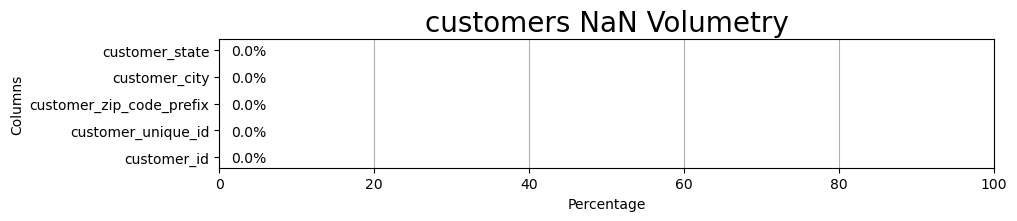

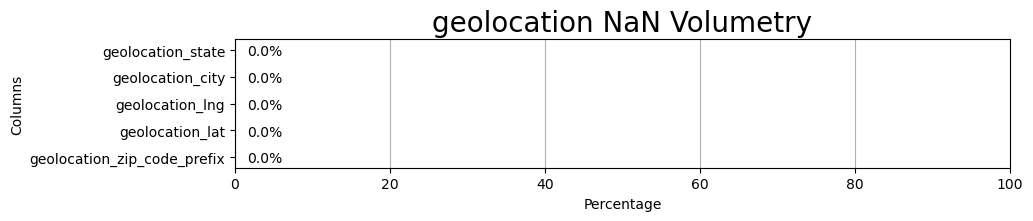

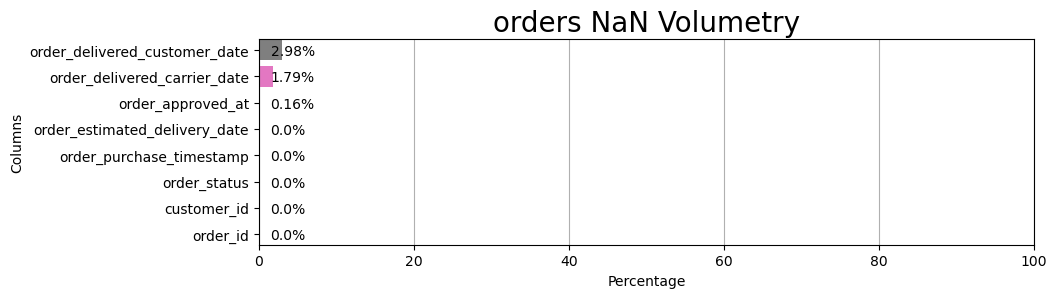

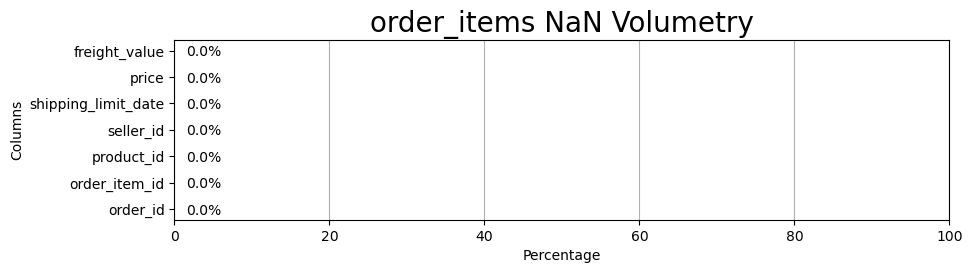

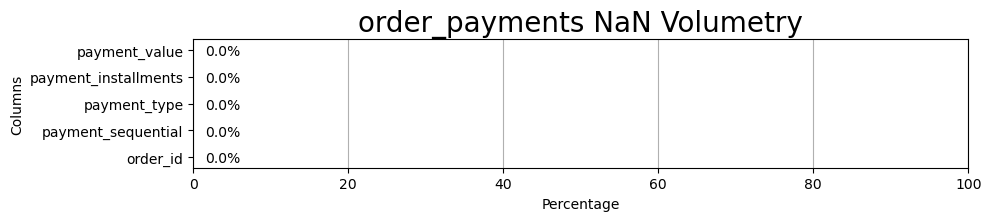

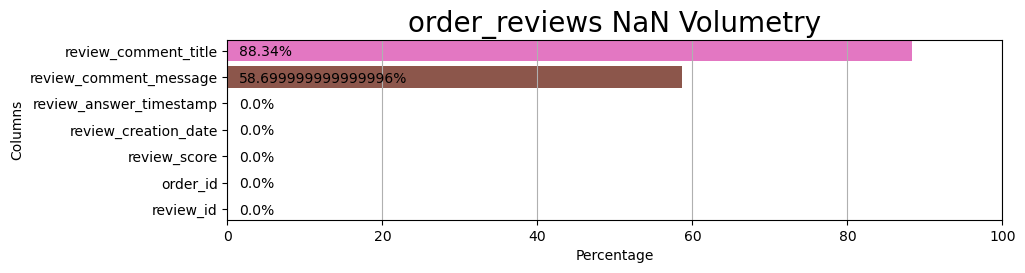

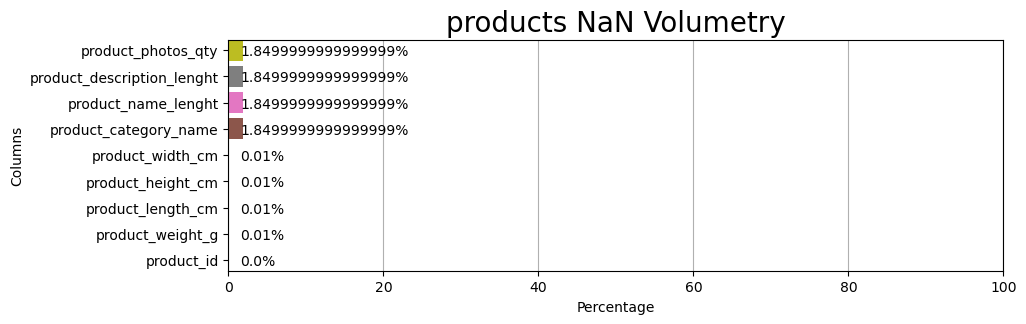

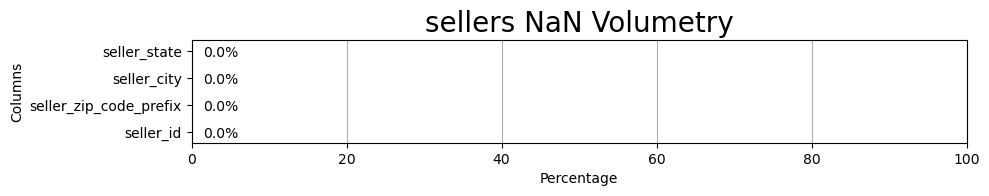

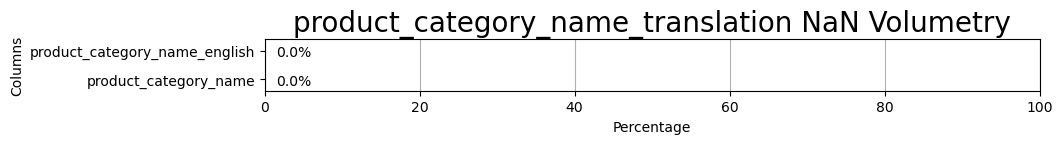

In [8]:
# Check NaN volumetry

for key, value in data_dict.items():
    nan_volumetry(value, title = key+' NaN Volumetry')

### 1.2 customers

##### customers state distribution

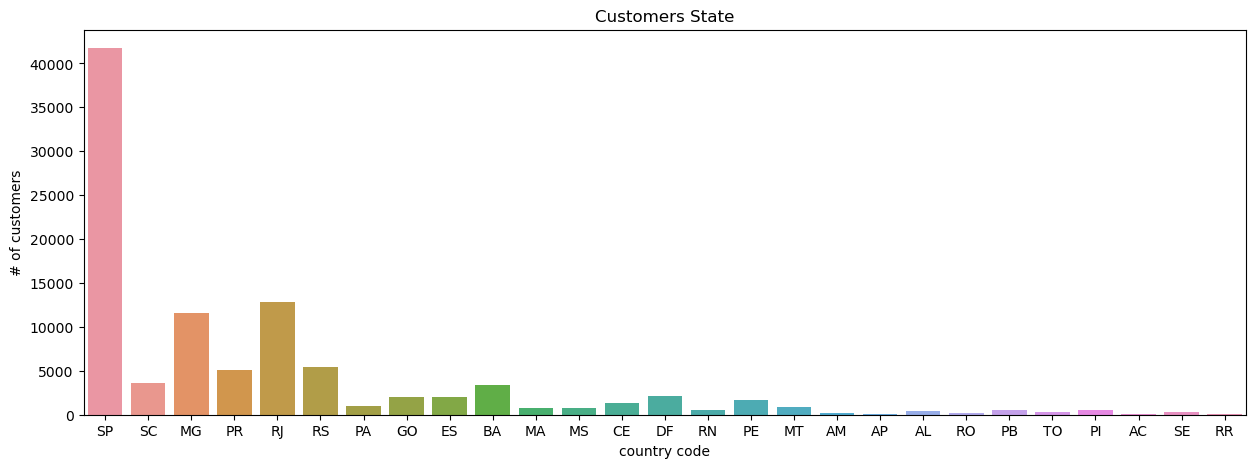

In [9]:
#Customers state distribution

plt.figure(figsize=(15,5))
sns.countplot(x='customer_state', data=data_dict['customers'])
plt.title('Customers State')
plt.xlabel('country code')
plt.ylabel('# of customers')
plt.show()
plt.close()



##### groupby customer_unique_id

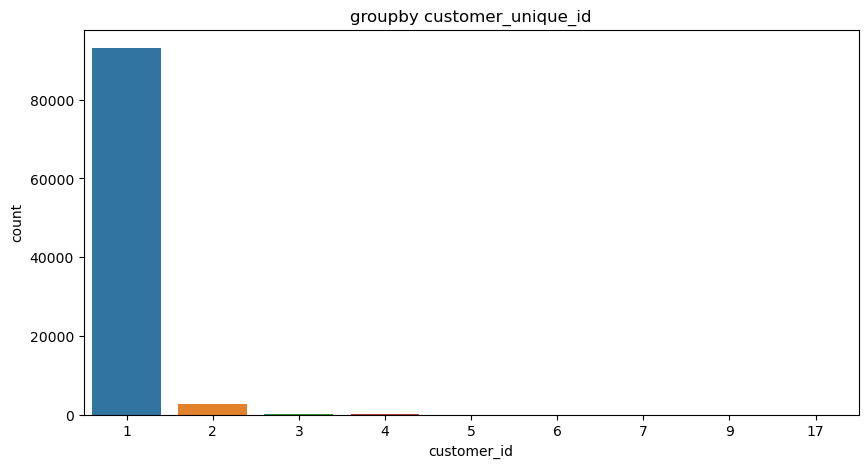

In [10]:
plt.figure(figsize=(10,5))
sns.countplot(data = data_dict['customers'].groupby('customer_unique_id').count(), x = 'customer_id')
plt.title("groupby customer_unique_id")
plt.show()
plt.close('all')

### 1.3 Geolocation

##### geopandas

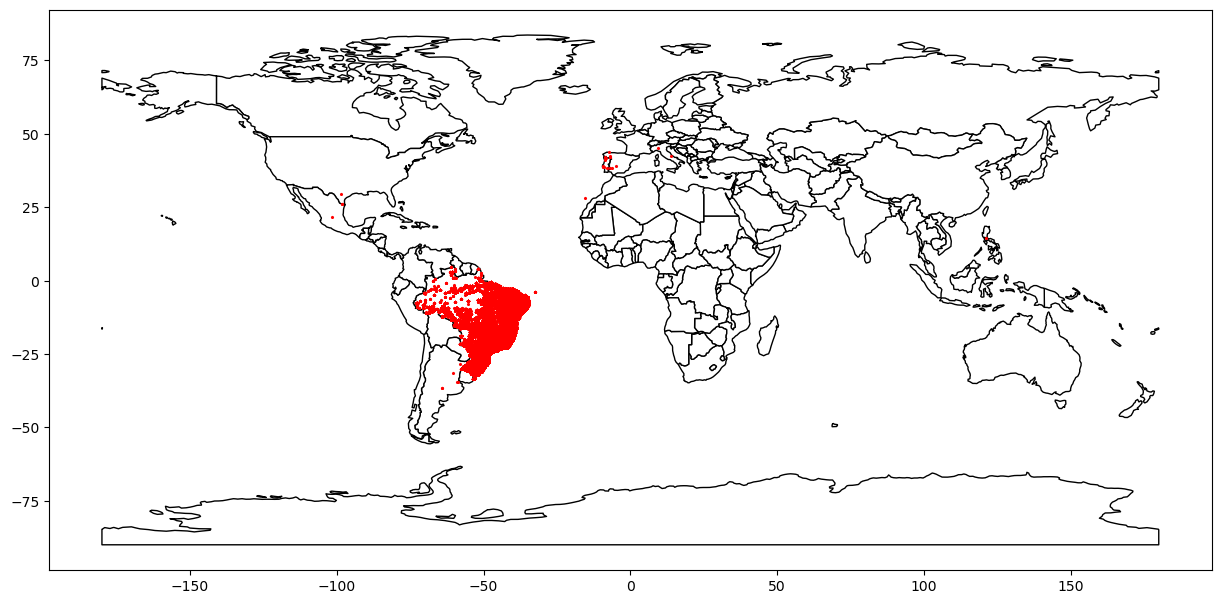

In [11]:
gdf = geopandas.GeoDataFrame(data_dict['geolocation'], 
                             geometry=geopandas.points_from_xy(data_dict['geolocation']['geolocation_lng'],
                                                               data_dict['geolocation']['geolocation_lat']))

world = geopandas.read_file(geopandas.datasets.get_path('naturalearth_lowres'))
ax = world.plot(color='white', edgecolor='black', figsize=(15,8))
           
gdf.plot(ax=ax, color='red', marker = '*', markersize=2)

plt.show()
plt.close('all')

### 1.4 Orders

##### order_status distribution

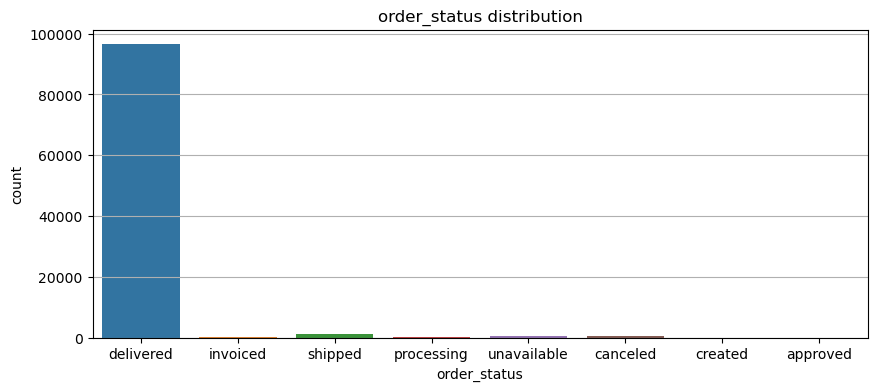

In [12]:
plt.figure(figsize=(10,4))
sns.countplot(data = data_dict['orders'], x = 'order_status')
plt.title("order_status distribution")
plt.grid(axis='y')
plt.show()
plt.close('all')

### 1.5 Order_items

##### order_item_id distribution

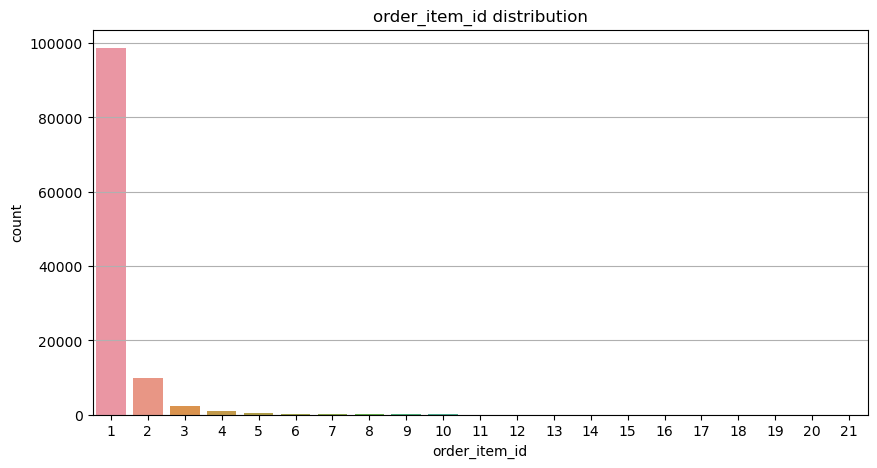

In [13]:
plt.figure(figsize=(10,5))
sns.countplot(data = data_dict['order_items'], x = 'order_item_id')
plt.title("order_item_id distribution")
plt.grid(axis='y')
plt.show()
plt.close('all')

##### price distribution

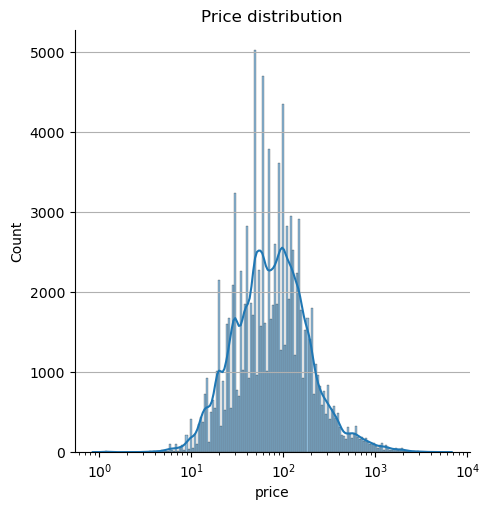

In [14]:
sns.displot(data = data_dict['order_items'], x='price', kde=True, log_scale=True)
plt.title('Price distribution')
plt.grid(axis='y')
plt.show()
plt.close('all')

##### freight_value distribution

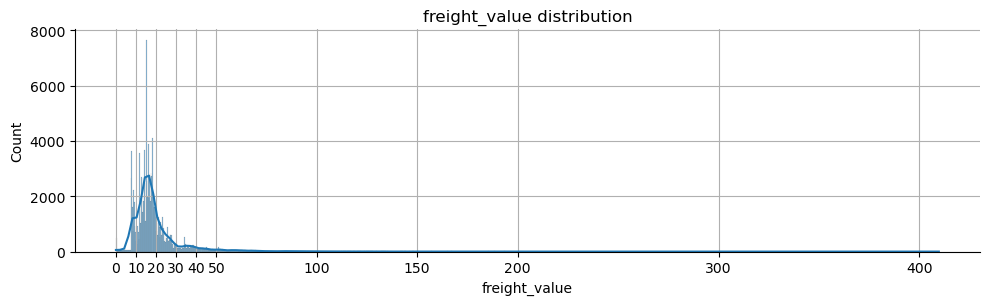

In [15]:

sns.displot(data = data_dict['order_items'], x='freight_value', kde=True, height=3, aspect=10/3)
plt.title('freight_value distribution')
plt.xticks([0,10,20,30,40,50,100,150,200,300,400])
plt.grid()
plt.show()
plt.close('all')

##### new feature : price_freight

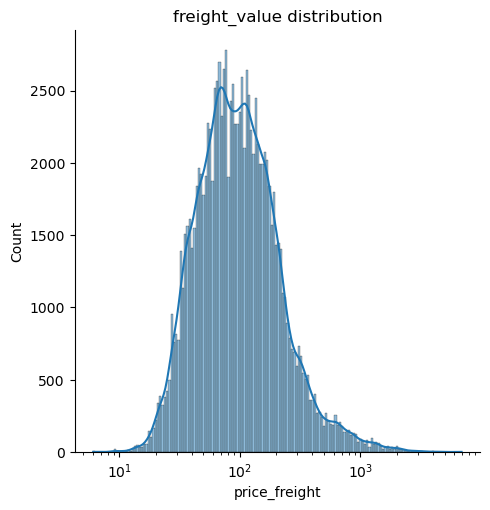

In [16]:
# create the new feature price_freight 
data_dict['order_items']['price_freight'] = data_dict['order_items']['price'] + data_dict['order_items']['freight_value']

#drop the olds freatures price and feright
data_dict['order_items'].drop(columns=['price', 'freight_value'], inplace=True)

sns.displot(data = data_dict['order_items'], x='price_freight', kde=True, log_scale=True)
plt.title('freight_value distribution')
plt.show()
plt.close('all')

### 1.6 Order_payments


##### payment_type distribution

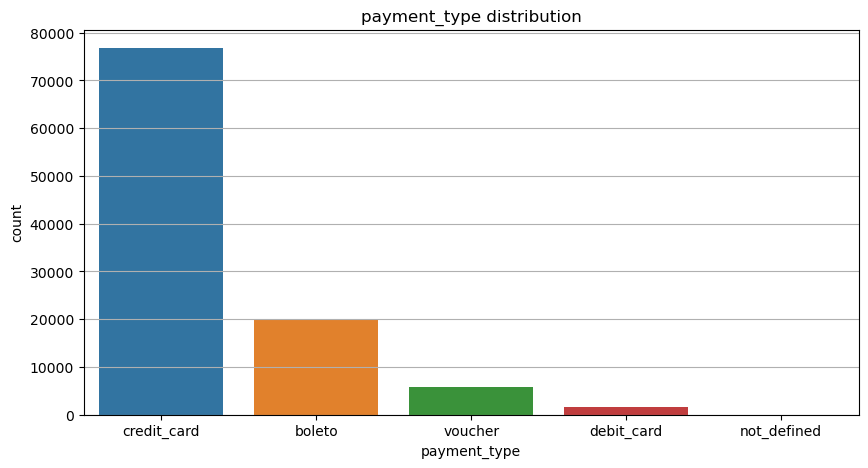

In [17]:
plt.figure(figsize=(10,5))
sns.countplot(data = data_dict['order_payments'], x = 'payment_type')
plt.title("payment_type distribution")
plt.grid(axis='y')
plt.show()
plt.close('all')

##### payment_value distribution

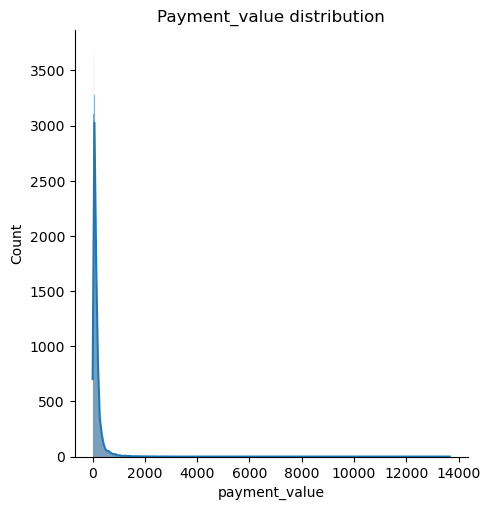

In [18]:
sns.displot(data=data_dict['order_payments'], x='payment_value', kde=True)
plt.title('Payment_value distribution')
plt.show()
plt.close('all')

##### payment_sequential distribution

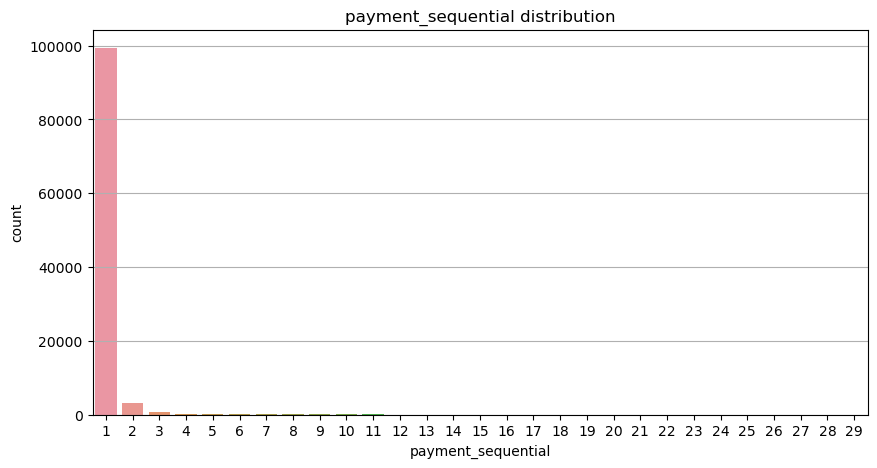

In [19]:
plt.figure(figsize=(10,5))
sns.countplot(data = data_dict['order_payments'], x = 'payment_sequential')
plt.title("payment_sequential distribution")
plt.grid(axis='y')
plt.show()
plt.close('all')

##### groupby order_id to have one unique payment

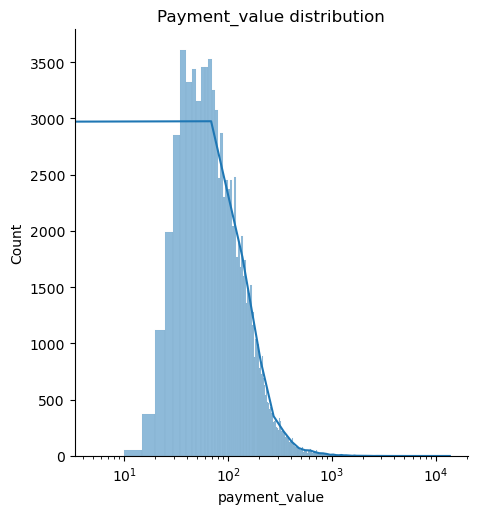

,order_id,payment_value
0,00010242fe8c5a6d1ba2dd792cb16214,72.19
1,00018f77f2f0320c557190d7a144bdd3,259.83
2,000229ec398224ef6ca0657da4fc703e,216.87
3,00024acbcdf0a6daa1e931b038114c75,25.78
4,00042b26cf59d7ce69dfabb4e55b4fd9,218.04


In [20]:
# Groupby order_payments by order_id to have one unique payment

# drop :  payment_sequential, 
#         payment_installments, 
#         payment_type

data_dict['order_payments'] = (data_dict['order_payments'].drop(columns=['payment_sequential','payment_installments', 'payment_type'])).groupby(by = 'order_id', as_index=False).sum()

sns.displot(data=data_dict['order_payments'], x='payment_value', kde=True)
plt.title('Payment_value distribution')
plt.xscale('log')
plt.show()
plt.close('all')

data_dict['order_payments'].head()

### 1.7 Order_reviews

##### review_score distribution

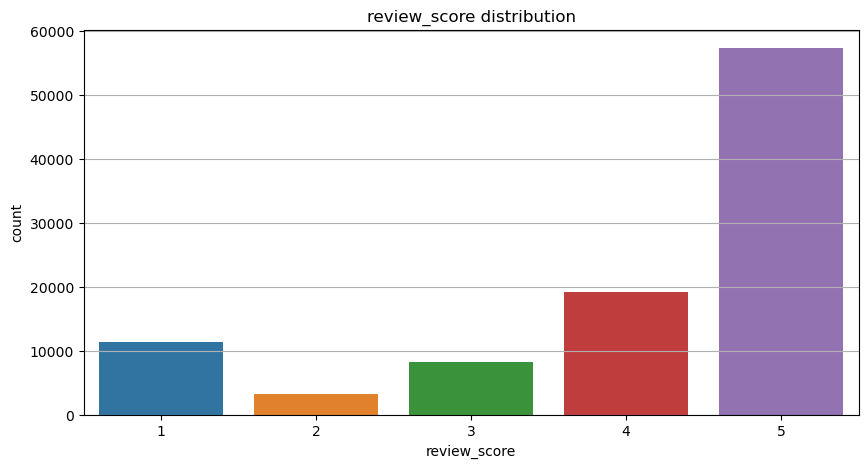

In [21]:
plt.figure(figsize=(10,5))
sns.countplot(data=data_dict['order_reviews'], x = 'review_score')
plt.title("review_score distribution")
plt.grid(axis='y')
plt.show()
plt.close('all')

##### drop : 'review_comment_title'  -  'review_comment_message'

In [22]:
data_dict['order_reviews'].drop(columns=['review_comment_title','review_comment_message'], inplace=True)
data_dict['order_reviews'].head()

,review_id,order_id,review_score,review_creation_date,review_answer_timestamp
0,7bc2406110b926393aa56f80a40eba40,73fc7af87114b39712e6da79b0a377eb,4,2018-01-18 00:00:00,2018-01-18 21:46:59
1,80e641a11e56f04c1ad469d5645fdfde,a548910a1c6147796b98fdf73dbeba33,5,2018-03-10 00:00:00,2018-03-11 03:05:13
2,228ce5500dc1d8e020d8d1322874b6f0,f9e4b658b201a9f2ecdecbb34bed034b,5,2018-02-17 00:00:00,2018-02-18 14:36:24
3,e64fb393e7b32834bb789ff8bb30750e,658677c97b385a9be170737859d3511b,5,2017-04-21 00:00:00,2017-04-21 22:02:06
4,f7c4243c7fe1938f181bec41a392bdeb,8e6bfb81e283fa7e4f11123a3fb894f1,5,2018-03-01 00:00:00,2018-03-02 10:26:53


### 1.8 Products

##### new feature : product_volume_cm^3

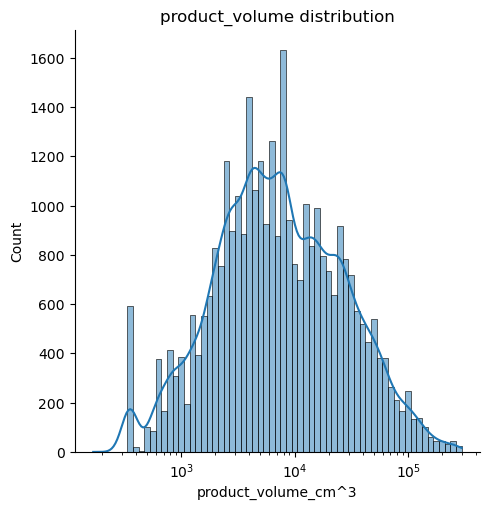

In [23]:
data_dict['products']['product_volume_cm^3'] = (data_dict['products']['product_width_cm']*
                                                data_dict['products']['product_height_cm']*
                                                data_dict['products']['product_length_cm'])
sns.displot(data=data_dict['products'], x='product_volume_cm^3', kde=True, log_scale=True)
plt.title('product_volume distribution')
plt.show()
plt.close('all')

##### drop : 'product_width_cm' - 'product_height_cm' - 'product_length_cm'

In [24]:
data_dict['products'].drop(columns=['product_width_cm','product_height_cm','product_length_cm'], inplace=True)

##### drop : 'product_photos_qty' - 'product_description_lenght' - 'product_name_lenght'

In [25]:
data_dict['products'].drop(columns=['product_photos_qty','product_description_lenght','product_name_lenght'], inplace=True)

In [26]:
data_dict['products'].head()

,product_id,product_category_name,product_weight_g,product_volume_cm^3
0,1e9e8ef04dbcff4541ed26657ea517e5,perfumaria,225.0,2240.0
1,3aa071139cb16b67ca9e5dea641aaa2f,artes,1000.0,10800.0
2,96bd76ec8810374ed1b65e291975717f,esporte_lazer,154.0,2430.0
3,cef67bcfe19066a932b7673e239eb23d,bebes,371.0,2704.0
4,9dc1a7de274444849c219cff195d0b71,utilidades_domesticas,625.0,4420.0


### 1.9 Sellers

##### seller_state distribution

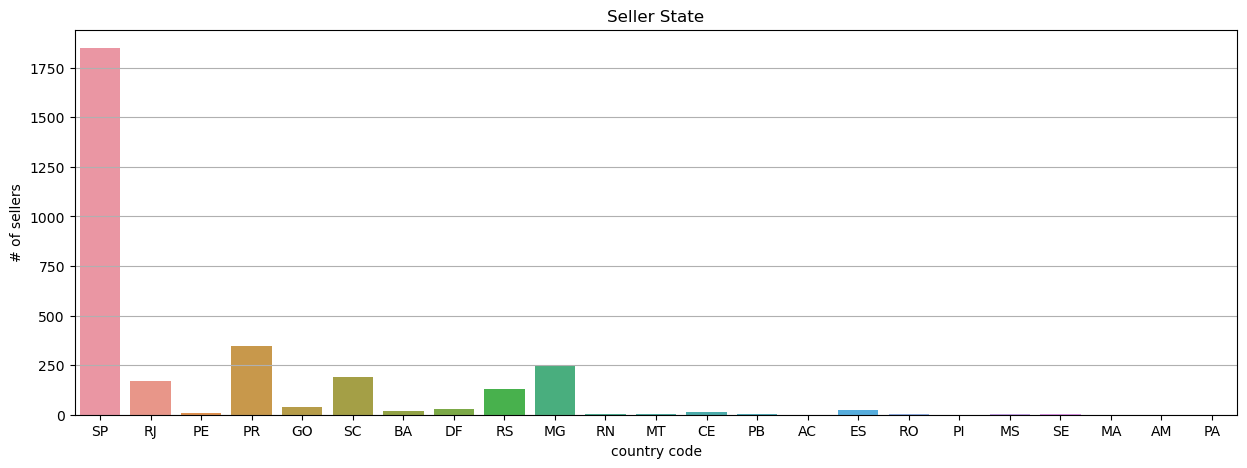

In [27]:
plt.figure(figsize=(15,5))
sns.countplot(x='seller_state', data=data_dict['sellers'])
plt.title('Seller State')
plt.xlabel('country code')
plt.ylabel('# of sellers')
plt.grid(axis='y')
plt.show()
plt.close()

## 2. Merge

### 2.1 Check commons features

In [28]:
# Check commons features and collect them in a DataFrame
# we are interested to see : 
# - the len of datasets to merge ;
# - the nunique of the commun feature on which we will merge.

data_features={}
features_in_common ={}

for key, value in data_dict.items():
    data_features[key]=value.columns

data_keys = list(data_features.keys())
t=0
for i in data_keys:
    data_keys.remove(i)
    for j in range(len(data_features[i])):
        for k in data_keys:
            if data_features[i][j] in data_features[k]:
                col = data_features[i][j]
                features_in_common[t] = [col,
                                         i, len(data_dict[i][col]), data_dict[i][col].nunique(),
                                         k, len(data_dict[k][col]), data_dict[k][col].nunique()]
                t+=1
            
features_in_common = pd.DataFrame.from_dict(features_in_common,
                                            orient='index', 
                                            columns=['feature',
                                                     '1st_dataset', '1st_dataset_len', '1st_dataset_feature_nunique',
                                                     '2nd_dataset', '2nd_dataset_len', '2nd_dataset_feature_nunique'])
features_in_common

,feature,1st_dataset,1st_dataset_len,1st_dataset_feature_nunique,2nd_dataset,2nd_dataset_len,2nd_dataset_feature_nunique
0,customer_id,customers,99441,99441,orders,99441,99441
1,order_id,orders,99441,99441,order_items,112650,98666
2,order_id,orders,99441,99441,order_payments,99440,99440
3,order_id,orders,99441,99441,order_reviews,99224,98673
4,order_id,order_payments,99440,99440,order_items,112650,98666
5,order_id,order_payments,99440,99440,order_reviews,99224,98673
6,product_id,products,32951,32951,order_items,112650,32951
7,product_category_name,products,32951,73,product_category_name_translation,71,71


### 2.2 Merge datasets


merge_data_dict results :

left data : customers - shape :  (99441, 5)
right data : orders - shape :  (99441, 8)
on : customer_id
how : inner

merge data shape : (99441, 12)


____________________________________________________________________________________________________
____________________________________________________________________________________________________



merge_data_dict results :

left data : data - shape :  (99441, 12)
right data : order_items - shape :  (112650, 6)
on : order_id
how : inner

merge data shape : (112650, 17)


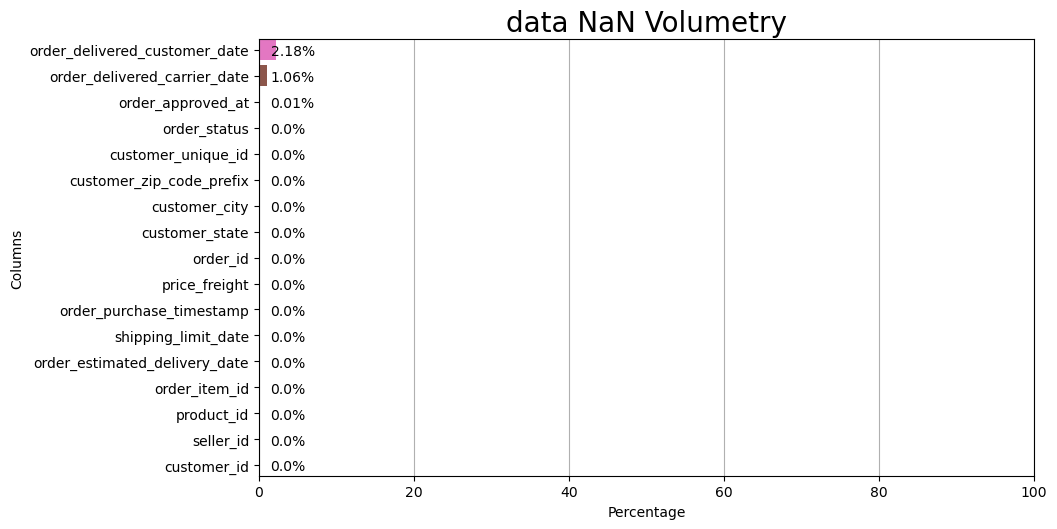



____________________________________________________________________________________________________
____________________________________________________________________________________________________



merge_data_dict results :

left data : data - shape :  (112650, 17)
right data : products - shape :  (32951, 4)
on : product_id
how : inner

merge data shape : (112650, 20)


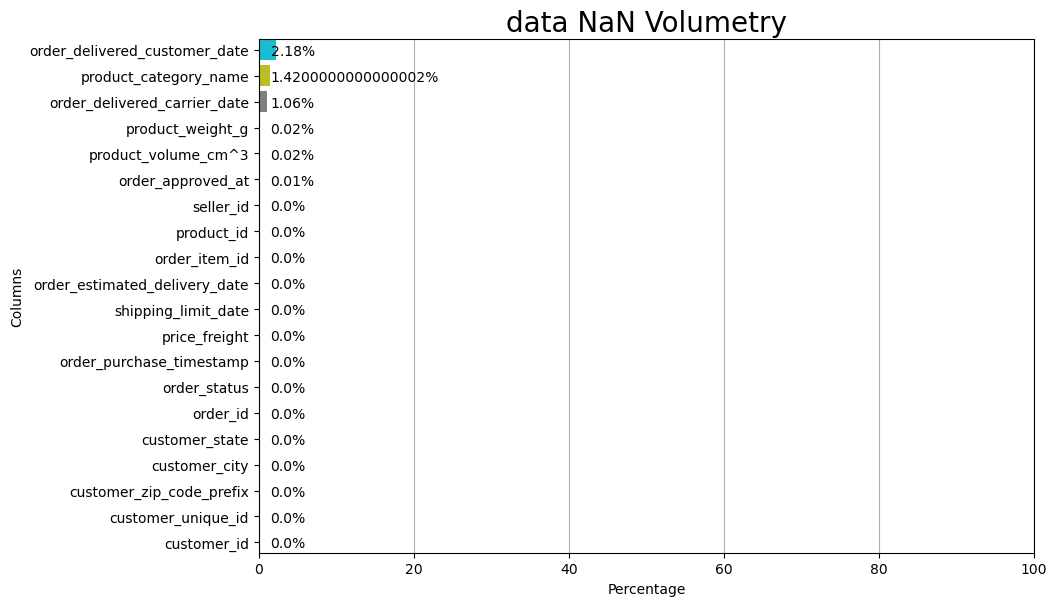



____________________________________________________________________________________________________
____________________________________________________________________________________________________



merge_data_dict results :

left data : data - shape :  (112650, 20)
right data : order_payments - shape :  (99440, 2)
on : order_id
how : inner

merge data shape : (112647, 21)


____________________________________________________________________________________________________
____________________________________________________________________________________________________



merge_data_dict results :

left data : data - shape :  (112647, 21)
right data : order_reviews - shape :  (99224, 5)
on : order_id
how : inner

merge data shape : (112369, 25)


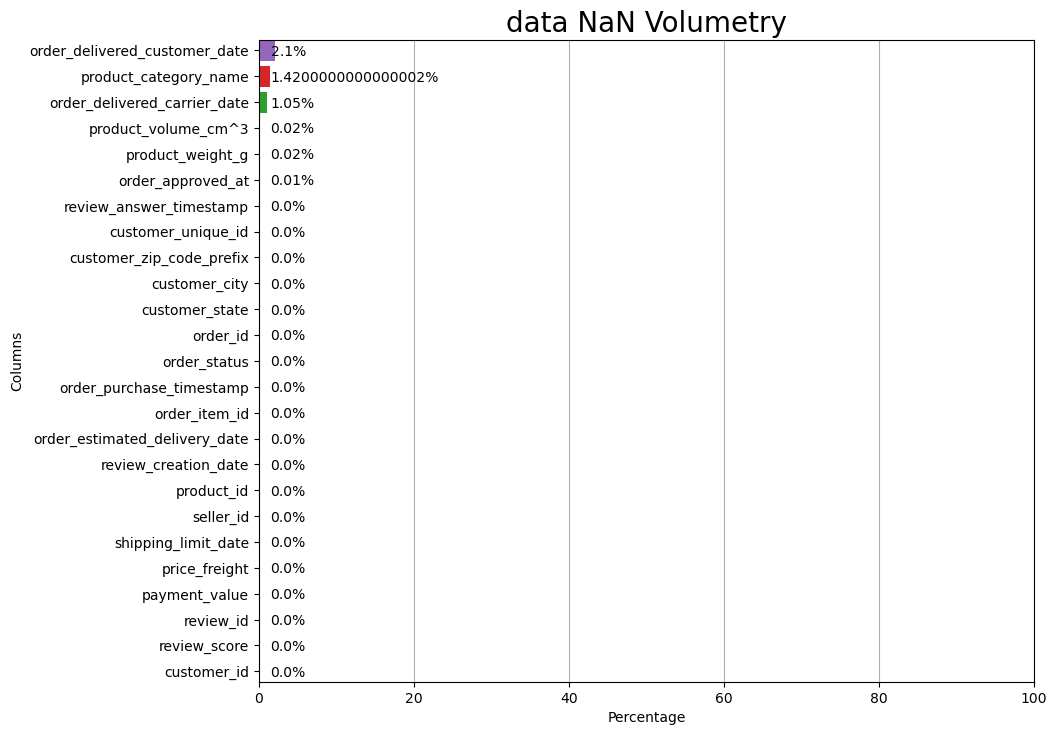



____________________________________________________________________________________________________
____________________________________________________________________________________________________



merge_data_dict results :

left data : data - shape :  (112369, 25)
right data : product_category_name_translation - shape :  (71, 2)
on : product_category_name
how : left

merge data shape : (112369, 26)


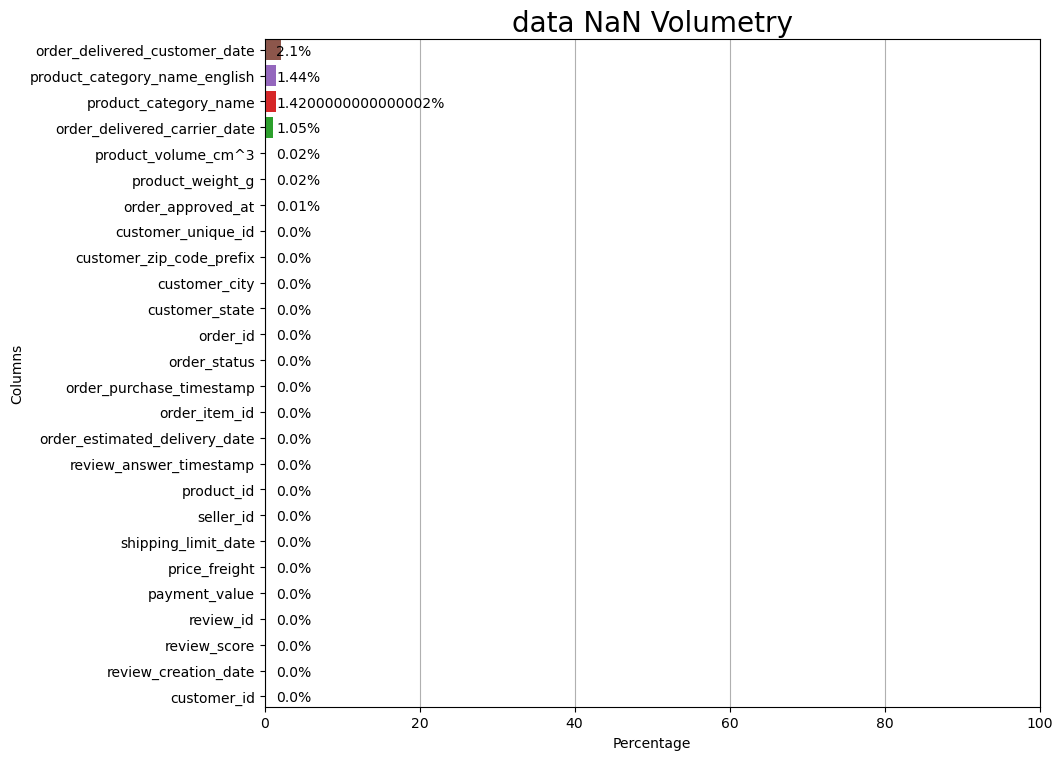



____________________________________________________________________________________________________
____________________________________________________________________________________________________




In [29]:
data_dict['data'] = merge_data_dict(data_dict = data_dict, 
                                    left = 'customers', 
                                    right = 'orders', 
                                    on = 'customer_id', 
                                    how = 'inner')

data_dict['data'] = merge_data_dict(data_dict = data_dict, 
                                    left = 'data', 
                                    right = 'order_items', 
                                    on = 'order_id', 
                                    how = 'inner')

data_dict['data'] = merge_data_dict(data_dict = data_dict, 
                                    left = 'data', 
                                    right = 'products', 
                                    on = 'product_id',
                                    how = 'inner')

data_dict['data'] = merge_data_dict(data_dict = data_dict, 
                                    left = 'data', 
                                    right = 'order_payments', 
                                    on = 'order_id', 
                                    how = 'inner')

data_dict['data'] = merge_data_dict(data_dict = data_dict, 
                                    left = 'data', 
                                    right = 'order_reviews', 
                                    on = 'order_id', 
                                    how = 'inner')

data_dict['data'] = merge_data_dict(data_dict = data_dict, 
                                    left = 'data', 
                                    right = 'product_category_name_translation', 
                                    on = 'product_category_name',
                                    how = 'left')

### 2.3 New DataFrame : df

In [30]:
df = pd.DataFrame(data_dict['data'])

## 3. Analyze df

### 3.1 Date time

In [31]:
pattern = '(\d{4})-(\d{2})-(\d{2}) (\d{2}):(\d{2}):(\d{2})'

for col in df.select_dtypes(include=['object']).columns:
    if re.match(pattern, df.loc[0,col]):
        df[col] = df[col].apply(pd.to_datetime)

### 3.2 Duplicated - shape - nunique - describe - info - nan_volumetry


DataFrame: 


,customer_id,customer_unique_id,customer_zip_code_prefix,customer_city,customer_state,order_id,order_status,order_purchase_timestamp,order_approved_at,order_delivered_carrier_date,order_delivered_customer_date,order_estimated_delivery_date,order_item_id,product_id,seller_id,shipping_limit_date,price_freight,product_category_name,product_weight_g,product_volume_cm^3,payment_value,review_id,review_score,review_creation_date,review_answer_timestamp,product_category_name_english
0,06b8999e2fba1a1fbc88172c00ba8bc7,861eff4711a542e4b93843c6dd7febb0,14409,franca,SP,00e7ee1b050b8499577073aeb2a297a1,delivered,2017-05-16 15:05:35,2017-05-16 15:22:12,2017-05-23 10:47:57,2017-05-25 10:35:35,2017-06-05,1,a9516a079e37a9c9c36b9b78b10169e8,7c67e1448b00f6e969d365cea6b010ab,2017-05-22 15:22:12,146.87,moveis_escritorio,8683.0,107136.0,146.87,88b8b52d46df026a9d1ad2136a59b30b,4,2017-05-26,2017-05-30 22:34:40,office_furniture
1,8912fc0c3bbf1e2fbf35819e21706718,9eae34bbd3a474ec5d07949ca7de67c0,68030,santarem,PA,c1d2b34febe9cd269e378117d6681172,delivered,2017-11-09 00:50:13,2017-11-10 00:47:48,2017-11-22 01:43:37,2017-11-28 00:09:50,2017-12-19,1,a9516a079e37a9c9c36b9b78b10169e8,7c67e1448b00f6e969d365cea6b010ab,2017-11-23 00:47:18,137.89,moveis_escritorio,8683.0,107136.0,275.79,7fc63200f12eebb5f387856afdd63db8,1,2017-11-29,2017-12-01 19:41:59,office_furniture
2,8912fc0c3bbf1e2fbf35819e21706718,9eae34bbd3a474ec5d07949ca7de67c0,68030,santarem,PA,c1d2b34febe9cd269e378117d6681172,delivered,2017-11-09 00:50:13,2017-11-10 00:47:48,2017-11-22 01:43:37,2017-11-28 00:09:50,2017-12-19,2,a9516a079e37a9c9c36b9b78b10169e8,7c67e1448b00f6e969d365cea6b010ab,2017-11-23 00:47:18,137.89,moveis_escritorio,8683.0,107136.0,275.79,7fc63200f12eebb5f387856afdd63db8,1,2017-11-29,2017-12-01 19:41:59,office_furniture
3,f0ac8e5a239118859b1734e1087cbb1f,3c799d181c34d51f6d44bbbc563024db,92480,nova santa rita,RS,b1a5d5365d330d10485e0203d54ab9e8,delivered,2017-05-07 20:11:26,2017-05-08 22:22:56,2017-05-19 20:16:31,2017-05-26 09:54:04,2017-06-12,1,a9516a079e37a9c9c36b9b78b10169e8,7c67e1448b00f6e969d365cea6b010ab,2017-05-22 22:22:56,140.61,moveis_escritorio,8683.0,107136.0,140.61,251191809e37c1cffc16865947c18a4d,3,2017-05-27,2017-05-28 02:43:16,office_furniture
4,6bc8d08963a135220ed6c6d098831f84,23397e992b09769faf5e66f9e171a241,25931,mage,RJ,2e604b3614664aa66867856dba7e61b7,delivered,2018-02-03 19:45:40,2018-02-04 22:29:19,2018-02-19 18:21:47,2018-02-28 21:09:00,2018-03-22,1,a9516a079e37a9c9c36b9b78b10169e8,7c67e1448b00f6e969d365cea6b010ab,2018-02-18 21:29:19,137.58,moveis_escritorio,8683.0,107136.0,137.58,f7123bac5b91a0e2e38d8b41fd1206f4,4,2018-03-01,2018-03-02 11:11:24,office_furniture
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
112364,f6c6d3e1e20969a5eed982163f959719,fb354969e06f2093c0083cbfbb91864e,1521,sao paulo,SP,b2f58affcc178fea2daaf834f1acff5e,delivered,2018-07-14 14:08:11,2018-07-17 04:31:33,2018-07-25 11:18:00,2018-07-26 19:18:32,2018-07-30,1,9682ad2500ae8b2609e6a88eb0cbc5bb,0bf0150d5b9d60d9cd2906003332f085,2018-07-25 04:31:33,121.04,casa_conforto,1500.0,60750.0,121.04,17e0e42ddf0dd7ebceff457b7c1da303,3,2018-07-27,2018-07-29 22:34:18,home_confort
112365,da37711b17efd5f2539e8196ab215f04,5f2971f9805e3ccb030226e30c8e8390,4313,sao paulo,SP,c8203bb57639618630affac9e8e923dd,delivered,2017-03-27 23:04:18,2017-03-27 23:23:38,2017-03-28 14:18:59,2017-03-30 17:06:19,2017-04-13,1,aea06073397f809424f946979354c9f0,f45122a9ab94eb4f3f8953578bc0c560,2017-04-02 23:23:38,30.95,pet_shop,300.0,4096.0,30.95,f3642bae4843d919c4c53ec1ff8fe26d,4,2017-03-31,2017-04-04 01:37:20,pet_shop
112366,184e0c2cfc746789643521df0e9ff904,c64ede6d0ae8901b1b6fb03528c1b7e6,68660,sao miguel do guama,PA,45b3000bcd10464ac178f32cd783fc83,delivered,2017-12-07 23:55:46,2017-12-09 23:50:32,2017-12-11 20:29:02,2018-01-05 17:59:38,2018-01-22,1,bbf975bffd2ae9ee52f513ae5c8a4b27,04aba03279157f6d4e0fe8ccaf21963c,2017-12-13 23:50:32,304.11,beleza_saude,2400.0,5280.0,3


DataFrame duplicated_sum : 0


____________________________________________________________________________________________________



df shape : (112369, 26)


____________________________________________________________________________________________________



DataFrame nunique :

review_score                         5
order_status                         7
order_item_id                       21
customer_state                      27
product_category_name_english       71
product_category_name               73
order_estimated_delivery_date      449
review_creation_date               632
product_weight_g                  2200
seller_id                         3090
customer_city                     4108
product_volume_cm^3               4517
customer_zip_code_prefix         14955
payment_value                    27737
price_freight                    29048
product_id                       32789
order_delivered_carrier_date     80449
order_approved_at                89533
shipping_li

,customer_zip_code_prefix,order_item_id,price_freight,product_weight_g,product_volume_cm^3,payment_value,review_score
count,112369.000000,112369.000000,112369.000000,112351.000000,112351.000000,112369.000000,112369.000000
mean,35132.428846,1.195988,140.359185,2090.640003,15219.056101,179.657456,4.032553
std,29894.798389,0.691226,189.214229,3748.653904,23353.849979,270.618409,1.387779
min,1003.000000,1.000000,6.080000,0.000000,168.000000,9.590000,1.000000
25%,11250.000000,1.000000,55.190000,300.000000,2856.000000,65.530000,4.000000
50%,24320.000000,1.000000,92.230000,700.000000,6468.000000,114.270000,5.000000
75%,59063.000000,1.000000,157.790000,1800.000000,18200.000000,195.080000,5.000000
max,99990.000000,21.000000,6929.310000,40425.000000,296208.000000,13664.080000,5.000000




____________________________________________________________________________________________________



DataFrame info :

<class 'pandas.core.frame.DataFrame'>
Int64Index: 112369 entries, 0 to 112368
Data columns (total 26 columns):
 #   Column                         Non-Null Count   Dtype         
---  ------                         --------------   -----         
 0   customer_id                    112369 non-null  object        
 1   customer_unique_id             112369 non-null  object        
 2   customer_zip_code_prefix       112369 non-null  int64         
 3   customer_city                  112369 non-null  object        
 4   customer_state                 112369 non-null  object        
 5   order_id                       112369 non-null  object        
 6   order_status                   112369 non-null  object        
 7   order_purchase_timestamp       112369 non-null  datetime64[ns]
 8   order_approved_at              112354 non-null  datetime64[ns]
 9   order_delive

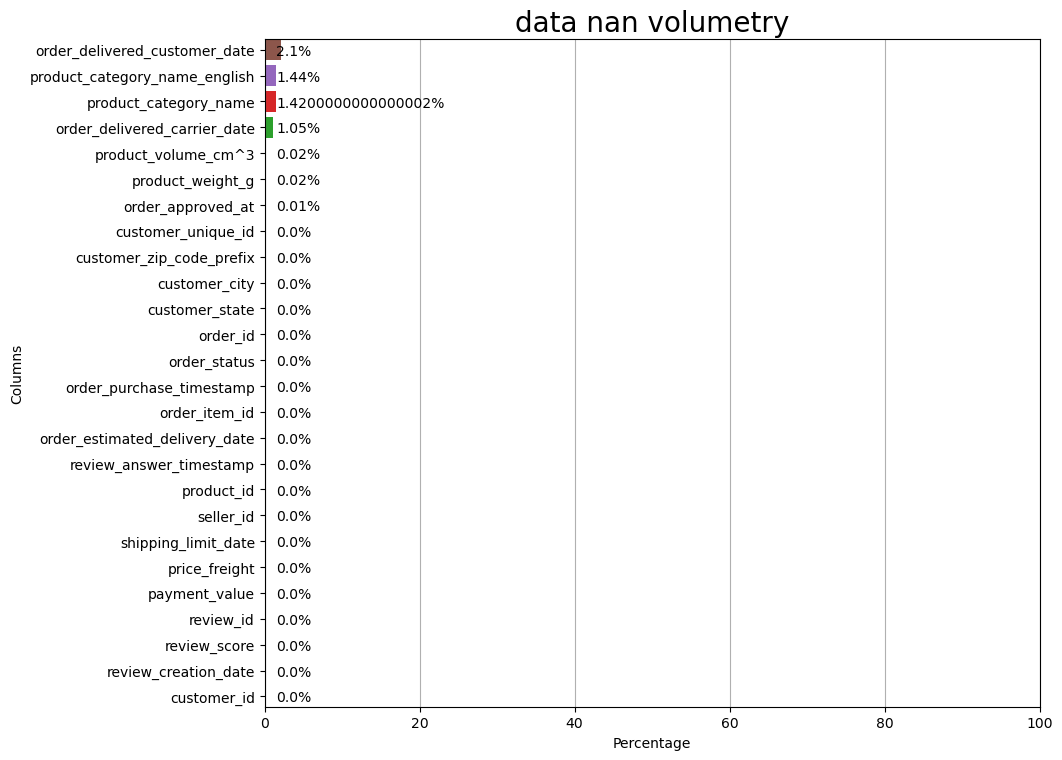

In [32]:
sep_line = '\n\n'+'_'*100+'\n\n'
print('\n\033[1mDataFrame: \033[0m' )
with pd.option_context("display.max_columns", None):
    display(df)

# duplicated
print('\nDataFrame duplicated_sum :',df.duplicated().sum())
print(sep_line)
# shape
print('\ndf shape :', df.shape)
print(sep_line)

# nunique
print('\nDataFrame nunique :\n')
print(df.nunique().sort_values())
print(sep_line)
    
# describe
print('\nDataFrame describe :')
display(df.describe())
print(sep_line)
    
# info
print('\nDataFrame info :\n')
print(df.info())
print(sep_line)
    
# nanvolumetry
print('\nDataFrame nan volumetry :')
nan_volumetry(df, title='data nan volumetry')

### 3.3 Groupby 

##### groupby 'customer_unique_id'.sum() / 'order_item_id' distribution

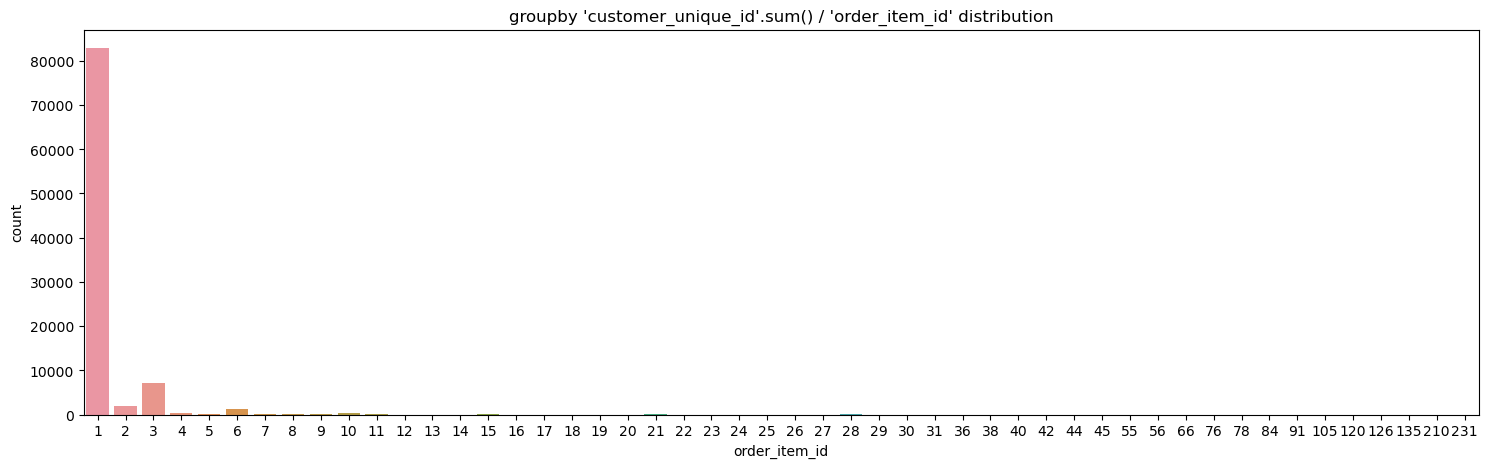

In [33]:
plt.figure(figsize=(18,5))
sns.countplot(data = df.groupby(by = ['customer_unique_id']).sum(), x = 'order_item_id')
plt.title("groupby 'customer_unique_id'.sum() / 'order_item_id' distribution")
plt.show()
plt.close()


##### groupby 'customer_unique_id'.count() / 'order_id' distribution

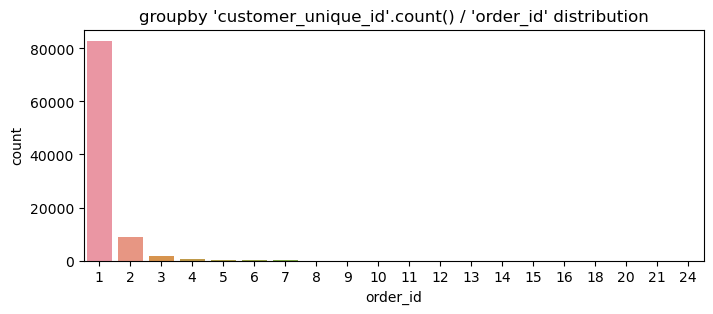

In [34]:
plt.figure(figsize=(8,3))
sns.countplot(data = df.groupby(by = ['customer_unique_id']).count(), x = 'order_id')
plt.title("groupby 'customer_unique_id'.count() / 'order_id' distribution")
plt.show()
plt.close()

### 3.4 NaN values

##### Order_delivered_customer_date

,customer_id,customer_unique_id,customer_zip_code_prefix,customer_city,customer_state,order_id,order_purchase_timestamp,order_approved_at,order_delivered_carrier_date,order_delivered_customer_date,...,price_freight,product_category_name,product_weight_g,product_volume_cm^3,payment_value,review_id,review_score,review_creation_date,review_answer_timestamp,product_category_name_english
order_status,,,,,,,,,,,,,,,,,,,,,
approved,3,3,3,3,3,3,3,3,0,0,...,3,3,3,3,3,3,3,3,3,3
canceled,522,522,522,522,522,522,522,522,60,0,...,522,508,522,522,522,522,522,522,522,506
delivered,8,8,8,8,8,8,8,8,7,0,...,8,8,8,8,8,8,8,8,8,8
invoiced,358,358,358,358,358,358,358,358,0,0,...,358,346,358,358,358,358,358,358,358,346
processing,352,352,352,352,352,352,352,352,0,0,...,352,339,352,352,352,352,352,352,352,339
shipped,1110,1110,1110,1110,1110,1110,1110,1110,1110,0,...,1110,1084,1110,1110,1110,1110,1110,1110,1110,1084
unavailable,7,7,7,7,7,7,7,7,0,0,...,7,7,7,7,7,7,7,7,7,7




____________________________________________________________________________________________________
____________________________________________________________________________________________________




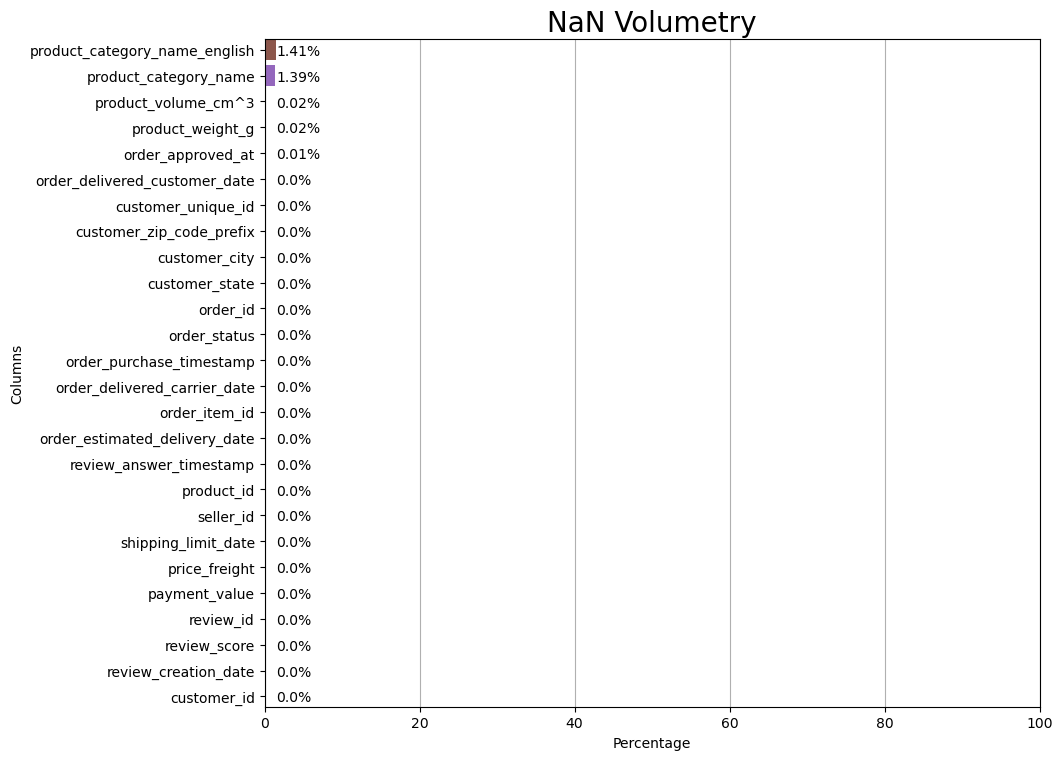

In [35]:
# groupby order_status .count()
# when order_delivered_customer_date is NaN
display(df.loc[df['order_delivered_customer_date'].isna(),:].groupby(by='order_status').count())
print(separator_line)

# if order_status == delivered
# order_delivered_customer_data = order_delivered_carrier_date
df.loc[df['order_delivered_customer_date'].isna() 
       & df['order_delivered_carrier_date'].notna() 
       & (df['order_status']=='delivered'),
       'order_delivered_customer_date'] = df.loc[df['order_delivered_customer_date'].isna() 
                                                 & df['order_delivered_carrier_date'].notna() 
                                                 & (df['order_status']=='delivered'),
                                                 'order_delivered_carrier_date']


# else drop when order_delivered_customer_data is NaN
df = df.loc[df['order_delivered_customer_date'].notna()]
nan_volumetry(df)


##### Order_approved_at

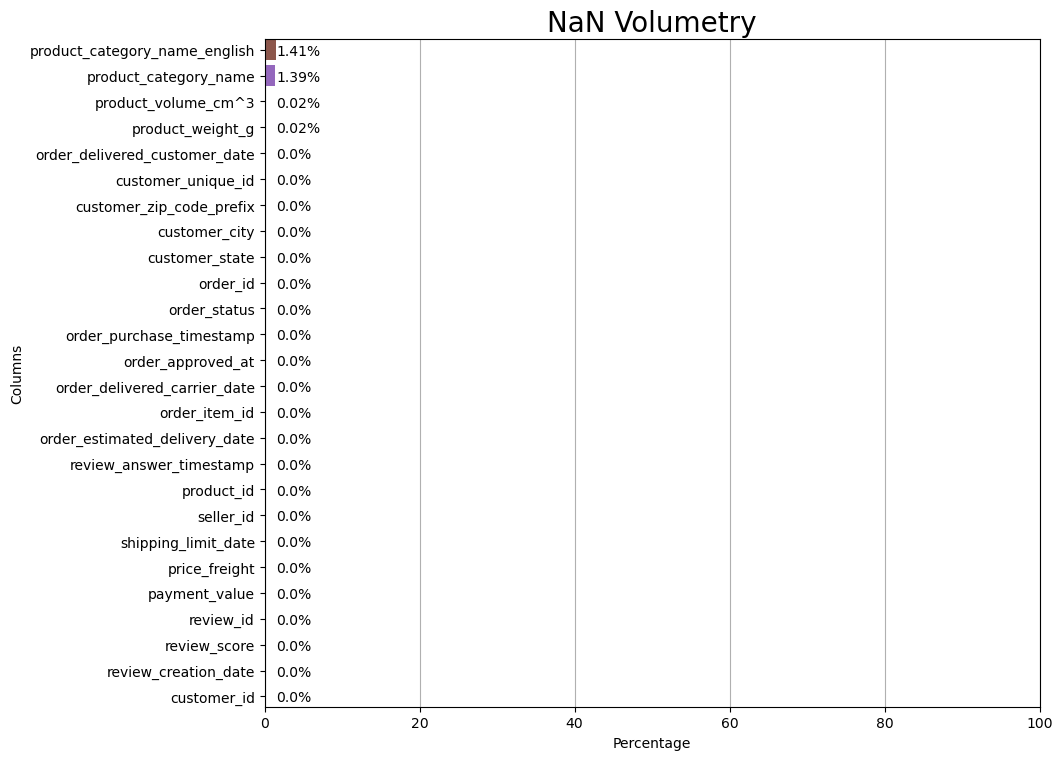

In [36]:
df.loc[df['order_approved_at'].isna(),'order_approved_at'] = df.loc[df['order_approved_at'].isna(), 'order_purchase_timestamp'] 
nan_volumetry(df)

##### Product_cetegory_name(_english)

,product_category_name,product_category_name_english
32520,portateis_cozinha_e_preparadores_de_alimentos,NaN
35021,pc_gamer,NaN
35022,pc_gamer,NaN
35023,pc_gamer,NaN
35024,pc_gamer,NaN
35025,pc_gamer,NaN
42796,portateis_cozinha_e_preparadores_de_alimentos,NaN
50476,portateis_cozinha_e_preparadores_de_alimentos,NaN
62028,portateis_cozinha_e_preparadores_de_alimentos,NaN
62029,portateis_cozinha_e_preparadores_de_alimentos,NaN




____________________________________________________________________________________________________
____________________________________________________________________________________________________


pc_gamer


,product_category_name,product_category_name_english
35021,pc_gamer,pc_gamer
35022,pc_gamer,pc_gamer
35023,pc_gamer,pc_gamer
35024,pc_gamer,pc_gamer
35025,pc_gamer,pc_gamer
93271,pc_gamer,pc_gamer
93272,pc_gamer,pc_gamer
93273,pc_gamer,pc_gamer




____________________________________________________________________________________________________
____________________________________________________________________________________________________


portateis_cozinha_e_preparadores_de_alimentos


,product_category_name,product_category_name_english
32520,portateis_cozinha_e_preparadores_de_alimentos,portable_kitchen_food_preparers
42796,portateis_cozinha_e_preparadores_de_alimentos,portable_kitchen_food_preparers
50476,portateis_cozinha_e_preparadores_de_alimentos,portable_kitchen_food_preparers
62028,portateis_cozinha_e_preparadores_de_alimentos,portable_kitchen_food_preparers
62029,portateis_cozinha_e_preparadores_de_alimentos,portable_kitchen_food_preparers
62030,portateis_cozinha_e_preparadores_de_alimentos,portable_kitchen_food_preparers
77611,portateis_cozinha_e_preparadores_de_alimentos,portable_kitchen_food_preparers
91742,portateis_cozinha_e_preparadores_de_alimentos,portable_kitchen_food_preparers
91743,portateis_cozinha_e_preparadores_de_alimentos,portable_kitchen_food_preparers
93400,portateis_cozinha_e_preparadores_de_alimentos,portable_kitchen_food_preparers




____________________________________________________________________________________________________
____________________________________________________________________________________________________




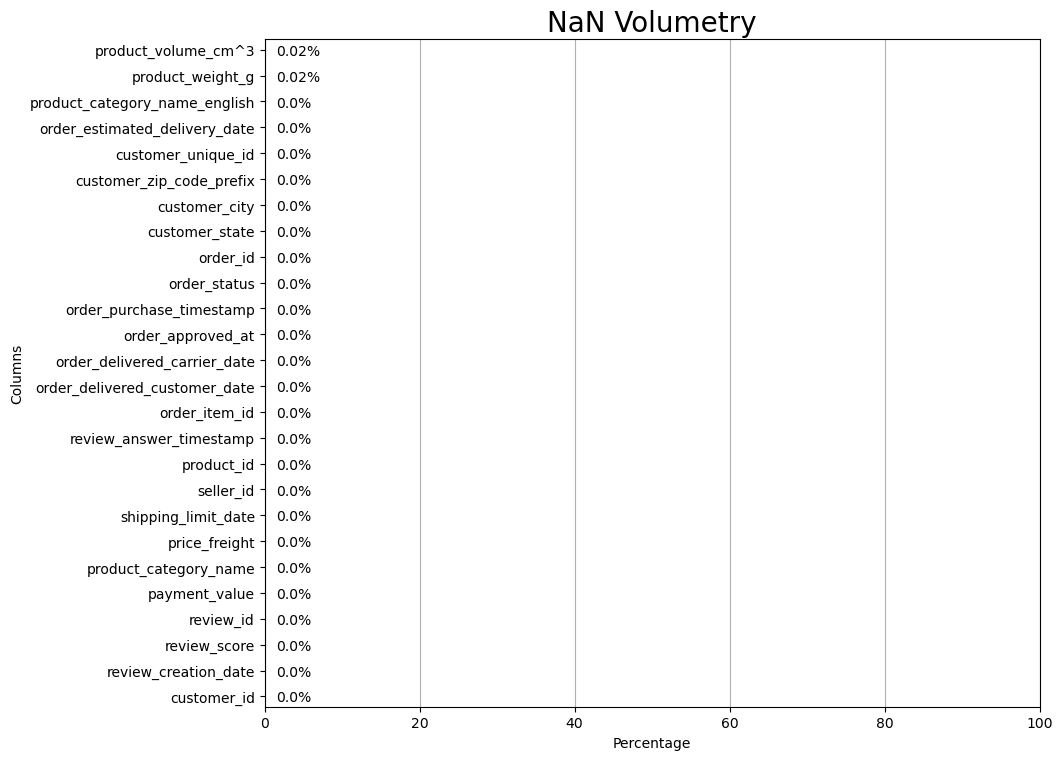

In [37]:
# missing translations
display(df.loc[df['product_category_name_english'].isna()& df['product_category_name'].notna(),['product_category_name','product_category_name_english']])
print(separator_line)

# pc_gamer
df.loc[df['product_category_name']=='pc_gamer','product_category_name_english'] = 'pc_gamer'
print('pc_gamer')
display(df.loc[df['product_category_name']=='pc_gamer',['product_category_name','product_category_name_english']])
print(separator_line)

# portateis_cozinha_e_preparadores_de_alimentos - portable_kitchen_food_preparers
df.loc[df['product_category_name']=='portateis_cozinha_e_preparadores_de_alimentos','product_category_name_english'] = 'portable_kitchen_food_preparers'
print('portateis_cozinha_e_preparadores_de_alimentos')
display(df.loc[df['product_category_name']=='portateis_cozinha_e_preparadores_de_alimentos',['product_category_name','product_category_name_english']])
print(separator_line)
# else
df['product_category_name_english'].fillna('unknown', inplace=True) 
df['product_category_name'].fillna('desconhecido', inplace=True) 
nan_volumetry(df)

##### product volume & weight

In [38]:
df['product_volume_cm^3'].fillna(0, inplace=True)
df['product_weight_g'].fillna(0, inplace=True)

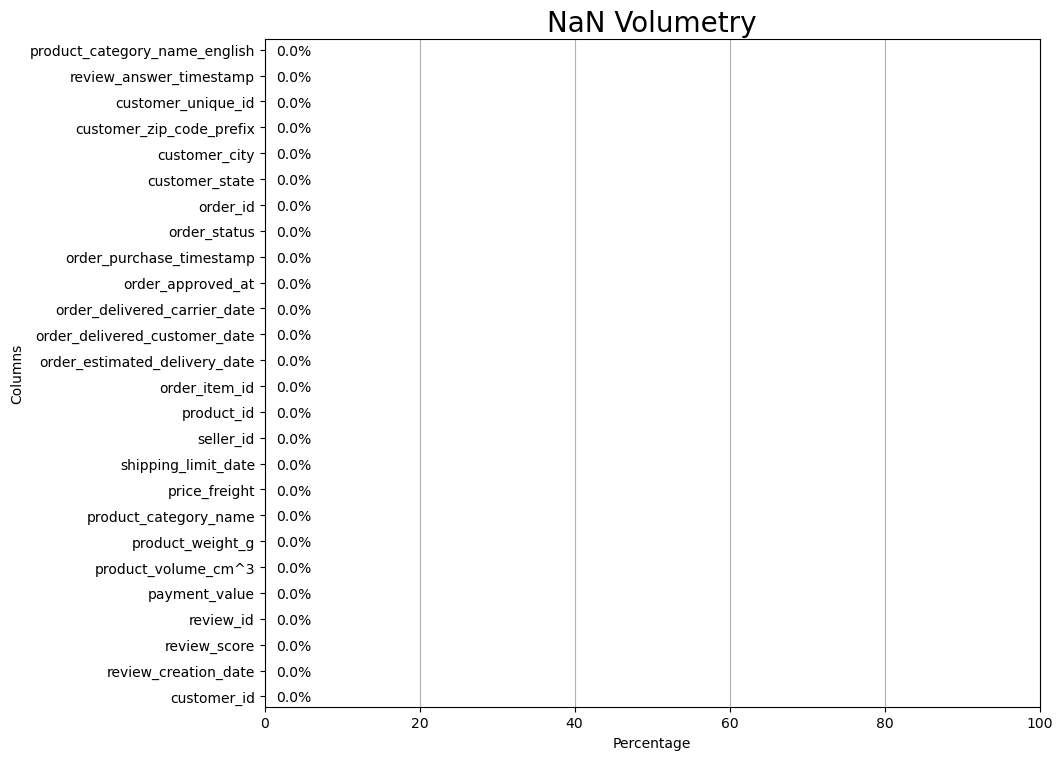

In [39]:
nan_volumetry(df)

### 3.5 New features

##### estimated_devilered_date / delivered_delay

In [40]:
df['order_delivered_delay'] = (df['order_delivered_customer_date']-df['order_estimated_delivery_date'])/ np.timedelta64(1, 'D')
df['order_delivery_time'] = (df['order_delivered_customer_date']-df['order_purchase_timestamp'])/ np.timedelta64(1, 'D')


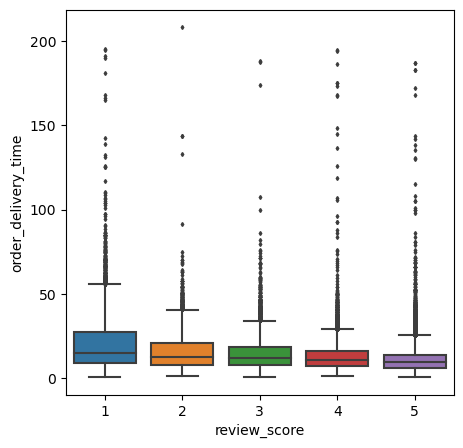

In [41]:
plt.figure(figsize=(5,5))
sns.boxplot(data=df, x='review_score',y='order_delivery_time',fliersize=2)
plt.show()
plt.close('all')

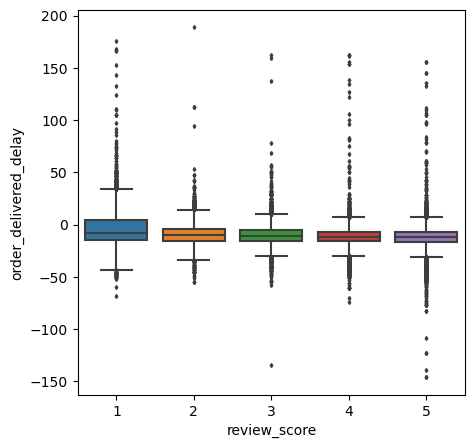

In [42]:
plt.figure(figsize=(5,5))
sns.boxplot(data=df, x='review_score',y='order_delivered_delay',fliersize=2)
plt.show()
plt.close('all')

<Figure size 1000x866.667 with 0 Axes>

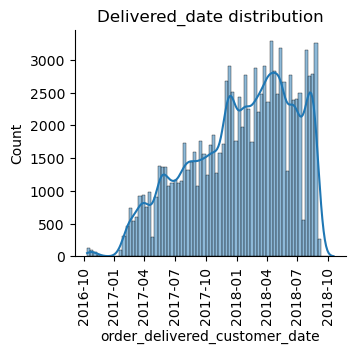

In [43]:
plt.figure()
sns.displot(data=df, x='order_delivered_customer_date', kde=True, height=3, aspect=5/4)
plt.title('Delivered_date distribution')
plt.xticks(rotation=90)
plt.show()
plt.close('all')

<Figure size 1000x866.667 with 0 Axes>

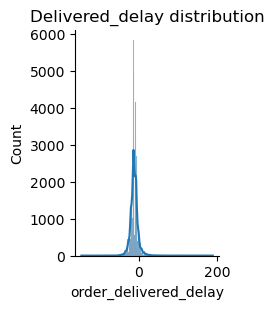

In [44]:
plt.figure()
sns.displot(data=df, x='order_delivered_delay', kde=True, height=3, aspect=5/6)
plt.title('Delivered_delay distribution')
plt.show()
plt.close('all')

<Figure size 1000x866.667 with 0 Axes>

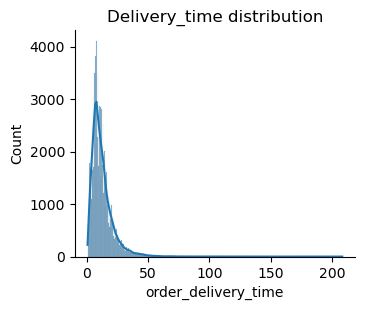

In [45]:
plt.figure()
sns.displot(data=df, x='order_delivery_time', kde=True, height=3, aspect=5/4)
plt.title('Delivery_time distribution')
plt.show()
plt.close('all')

## 4. Groupby DataFrames

### 4.1 Recency

Latest date in dataset:  2018-08-29 15:00:37


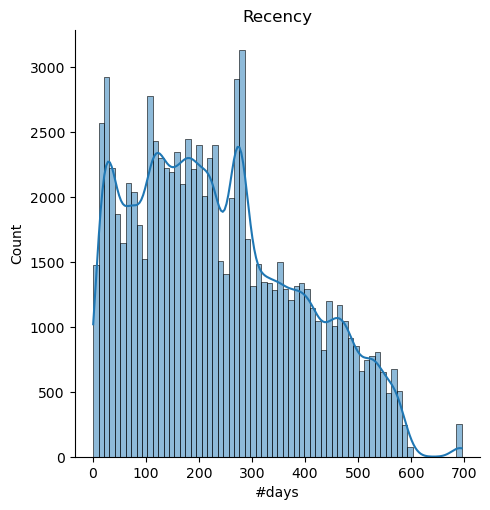

In [46]:
present_day = df['order_purchase_timestamp'].max() + dt.timedelta(days=1)
print("Latest date in dataset: ", df['order_purchase_timestamp'].max())
recency_df= pd.DataFrame(df.groupby(by='customer_unique_id', as_index=False)['order_purchase_timestamp'].max())
recency_df['Recency']= recency_df['order_purchase_timestamp'].apply(lambda x: (present_day - x).days)
recency_df.drop(columns='order_purchase_timestamp', inplace=True)

# displot
sns.displot(data=recency_df, x='Recency', kde=True)
plt.title('Recency')
plt.xlabel('#days')
plt.show()
plt.close('all')


### 4.2 Frequency

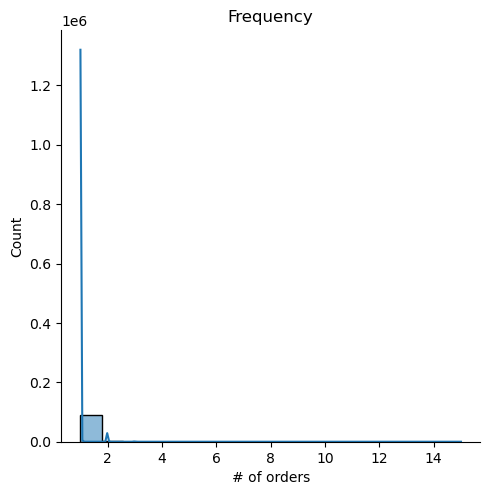

In [47]:
frequency_df = pd.DataFrame(df.groupby(["customer_unique_id"]).agg({"order_id":"nunique"}).reset_index())
frequency_df.rename(columns={"order_id":"Frequency"}, inplace=True)

# displot
sns.displot(data=frequency_df, x='Frequency', kde=True)
plt.title('Frequency')
plt.xlabel('# of orders')
plt.show()
plt.close('all')


### 4.3 Monetary

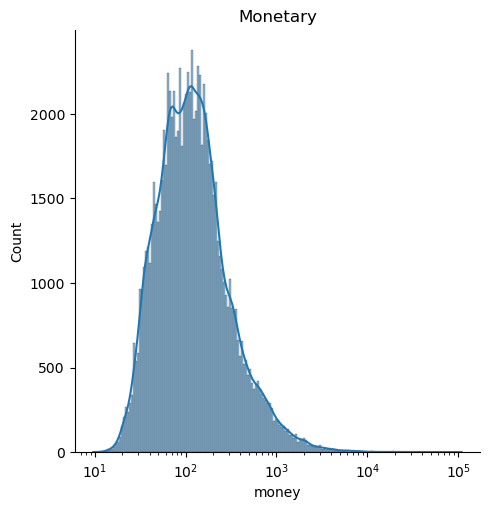

In [48]:
monetary_df = df.groupby('customer_unique_id', as_index=False)['payment_value'].sum()
monetary_df.columns = ['customer_unique_id', 'Monetary']


# displot
sns.displot(data=monetary_df, x='Monetary', kde=True, log_scale=True)
plt.title('Monetary')
plt.xlabel('money')
plt.show()
plt.close('all')


### 4.4 Monetary_mean

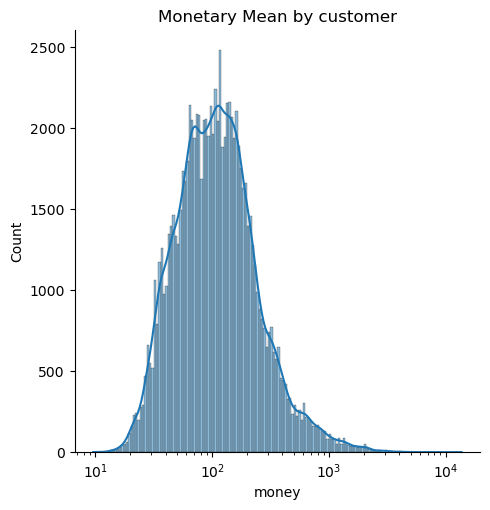

In [49]:
monetary_mean_df = df.groupby('customer_unique_id', as_index=False)['payment_value'].mean()
monetary_mean_df.columns = ['customer_unique_id', 'Monetary_mean']


# displot
sns.displot(data=monetary_mean_df, x='Monetary_mean', kde=True, log_scale=True)
plt.title('Monetary Mean by customer')
plt.xlabel('money')
plt.show()
plt.close('all')


### 4.5 Item_sum

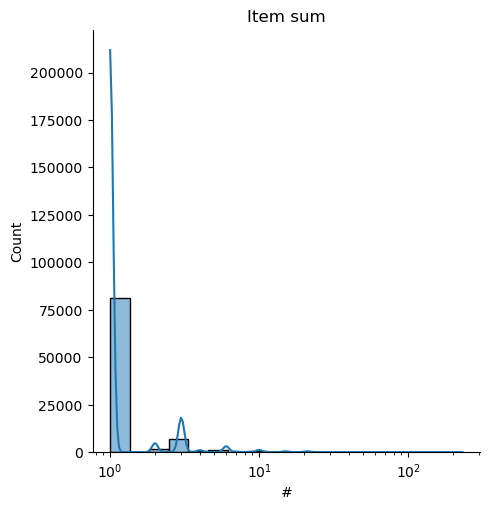

In [50]:
items_sum_df = df.groupby(by='customer_unique_id', as_index=False)['order_item_id'].sum()
items_sum_df.columns = ['customer_unique_id', 'Items_sum']

# displot
sns.displot(data=items_sum_df, x='Items_sum', kde=True, log_scale=True)
plt.title('Item sum')
plt.xlabel('#')
plt.show()
plt.close('all')


### 4.6 Item_mean

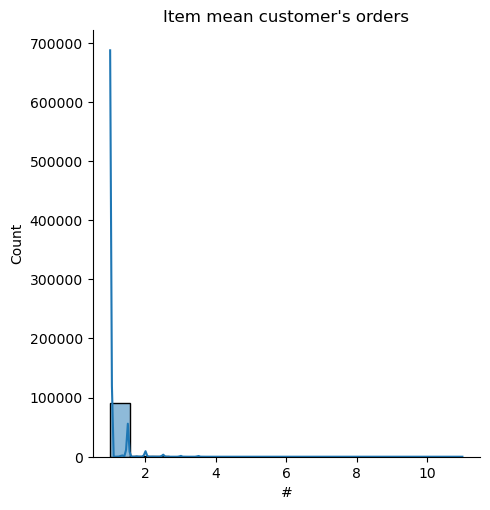

In [51]:
items_mean_df = df.groupby(by=['customer_unique_id'], as_index=False)['order_item_id'].mean()
items_mean_df.columns = ['customer_unique_id', 'Items_mean']
items_mean_df

# displot
sns.displot(data=items_mean_df, x='Items_mean', kde=True)
plt.title("Item mean customer's orders")
plt.xlabel('#')
plt.show()
plt.close('all')


### 4.7 Score_mean

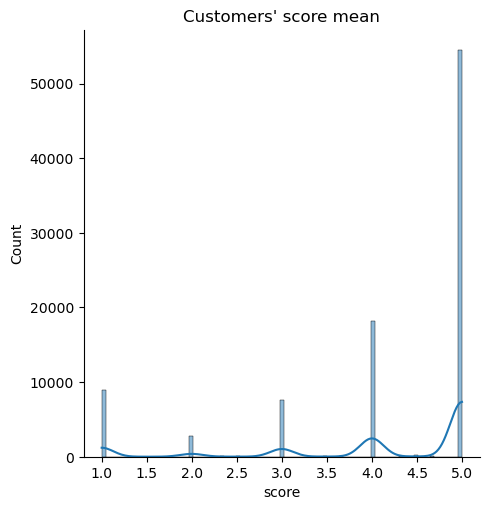

In [52]:
score_mean_df = df.groupby(by='customer_unique_id', as_index=False)['review_score'].mean()
score_mean_df.columns = ['customer_unique_id', 'Score_mean']

# displot
sns.displot(data=score_mean_df, x='Score_mean', kde=True)
plt.title("Customers' score mean")
plt.xlabel('score')
plt.show()
plt.close('all')


## 5. RFM

### 5.1 RFM DataFrame

In [53]:
RF_df = recency_df.merge(frequency_df, on='customer_unique_id')
RFM_df = RF_df.merge(monetary_df, on='customer_unique_id')
RFM_df.set_index('customer_unique_id', inplace=True)
RFM_df

,Recency,Frequency,Monetary
customer_unique_id,,,
0000366f3b9a7992bf8c76cfdf3221e2,112,1,141.90
0000b849f77a49e4a4ce2b2a4ca5be3f,115,1,27.19
0000f46a3911fa3c0805444483337064,537,1,86.22
0000f6ccb0745a6a4b88665a16c9f078,321,1,43.62
0004aac84e0df4da2b147fca70cf8255,288,1,196.89
...,...,...,...
fffcf5a5ff07b0908bd4e2dbc735a684,447,1,4134.84
fffea47cd6d3cc0a88bd621562a9d061,262,1,84.58
ffff371b4d645b6ecea244b27531430a,568,1,112.46


### 5.2 Skew & StandardScaler

In [54]:
RFM_skew_df = RFM_df.copy()
display(best_skew_method(RFM_skew_df, RFM_skew_df.columns))

,Features,Original_skew,Log_skew,SquareRoot_skew,CubeRoot_skew,Boxcox_skew
0,Recency,0.448382,-1.287486,-0.227116,-0.518128,-0.157660
1,Frequency,11.193527,6.116369,7.104570,6.633191,5.530949
2,Monetary,71.325699,0.727914,4.915033,2.505159,0.014637


Recency 
Skew : -0.1576573266464522;
SkewtestResult(statistic=-19.484522650131424, pvalue=1.4855835566894963e-84)


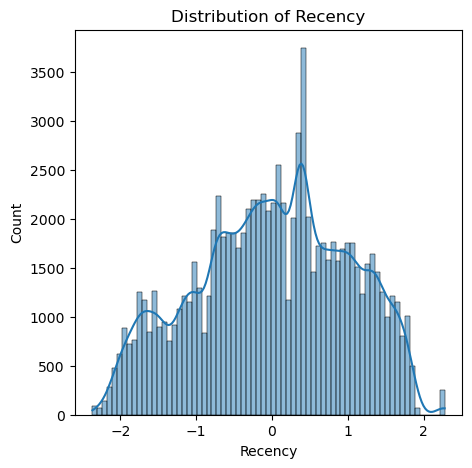

Frequency 
Skew : 5.530859689957625;
SkewtestResult(statistic=265.1769693177221, pvalue=0.0)


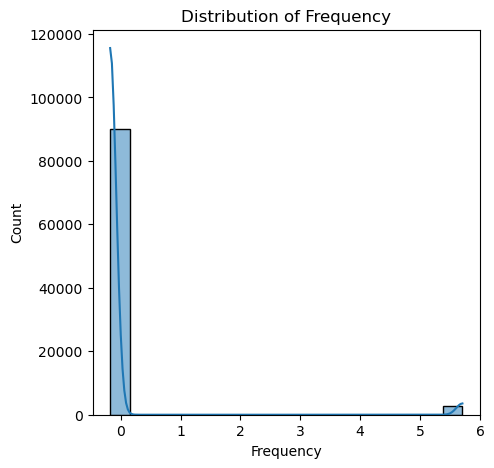

Monetary 
Skew : 0.014636987758236266;
SkewtestResult(statistic=1.8199772838040025, pvalue=0.06876246433435022)


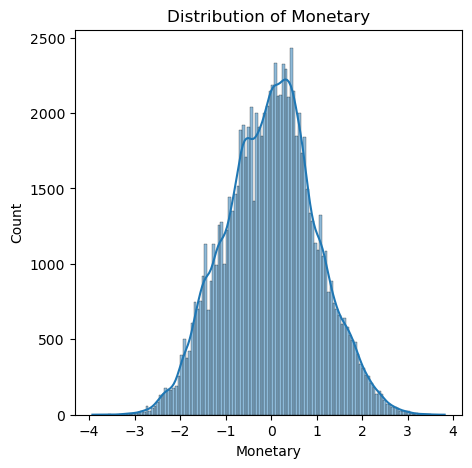

In [55]:
# improve skew
RFM_skew_df['Recency'] = stats.boxcox(RFM_skew_df['Recency'])[0]
RFM_skew_df['Frequency'] = stats.boxcox(RFM_skew_df['Frequency'])[0]
RFM_skew_df['Monetary'] = stats.boxcox(RFM_skew_df['Monetary'])[0]

# StandardScaler
RFM_skew_scaled_df = StandardScaler().fit_transform(RFM_skew_df)
RFM_skew_scaled_df = pd.DataFrame(RFM_skew_scaled_df, columns=RFM_skew_df.columns, index= RFM_skew_df.index)
check_skew(RFM_skew_scaled_df, 'Recency')
check_skew(RFM_skew_scaled_df, 'Frequency')
check_skew(RFM_skew_scaled_df, 'Monetary')

## 6. Second DataFrame for clustering

### 6.1 Clustering DataFrame

In [56]:
second_cluster_df = recency_df.merge(frequency_df, on='customer_unique_id')
second_cluster_df = second_cluster_df.merge(items_mean_df, on='customer_unique_id')
second_cluster_df = second_cluster_df.merge(monetary_mean_df, on='customer_unique_id')
second_cluster_df = second_cluster_df.merge(score_mean_df, on='customer_unique_id')
second_cluster_df.set_index('customer_unique_id', inplace=True)
second_cluster_df

,Recency,Frequency,Items_mean,Monetary_mean,Score_mean
customer_unique_id,,,,,
0000366f3b9a7992bf8c76cfdf3221e2,112,1,1.0,141.90,5.0
0000b849f77a49e4a4ce2b2a4ca5be3f,115,1,1.0,27.19,4.0
0000f46a3911fa3c0805444483337064,537,1,1.0,86.22,3.0
0000f6ccb0745a6a4b88665a16c9f078,321,1,1.0,43.62,4.0
0004aac84e0df4da2b147fca70cf8255,288,1,1.0,196.89,5.0
...,...,...,...,...,...
fffcf5a5ff07b0908bd4e2dbc735a684,447,1,1.5,2067.42,5.0
fffea47cd6d3cc0a88bd621562a9d061,262,1,1.0,84.58,4.0
ffff371b4d645b6ecea244b27531430a,568,1,1.0,112.46,5.0


### 6.2 Skew & StandardScaler

In [57]:
sec_skew_df = second_cluster_df.copy()
display(best_skew_method(sec_skew_df, sec_skew_df.columns))

,Features,Original_skew,Log_skew,SquareRoot_skew,CubeRoot_skew,Boxcox_skew
0,Recency,0.448382,-1.287486,-0.227116,-0.518128,-0.157660
1,Frequency,11.193527,6.116369,7.104570,6.633191,5.530949
2,Items_mean,7.316869,3.955035,4.962042,4.540144,2.645113
3,Monetary_mean,9.271074,0.525606,2.550841,1.683653,0.004729
4,Score_mean,-1.477217,-2.019549,-1.746493,-1.838855,-0.827436


Recency 
Skew : -0.1576573266464522;
SkewtestResult(statistic=-19.484522650131424, pvalue=1.4855835566894963e-84)


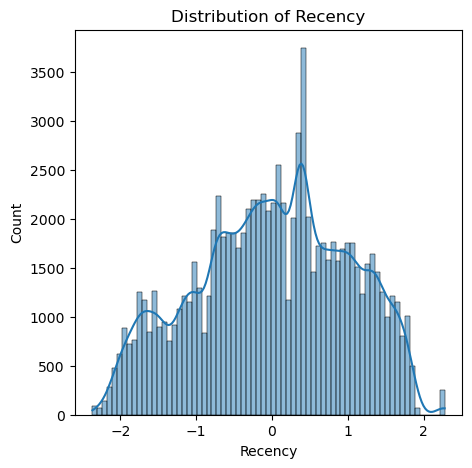

Frequency 
Skew : 5.530859689957625;
SkewtestResult(statistic=265.1769693177221, pvalue=0.0)


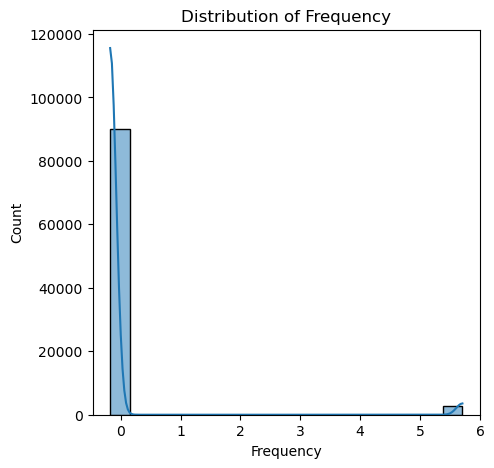

Score_mean 
Skew : -0.8274227585990064;
SkewtestResult(statistic=-90.44504785132742, pvalue=0.0)


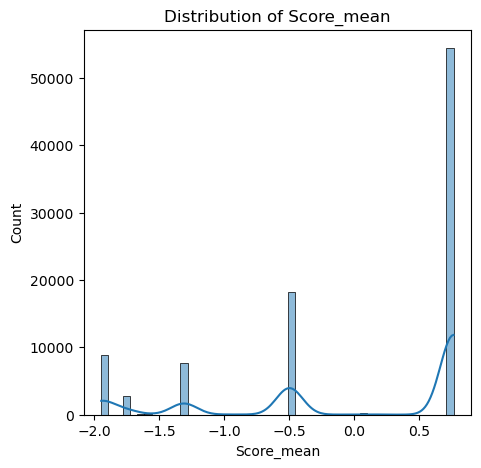

Items_mean 
Skew : 2.6450705903923932;
SkewtestResult(statistic=192.06359870697543, pvalue=0.0)


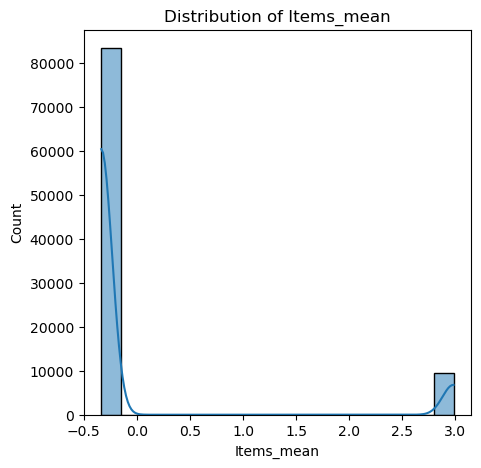

Monetary_mean 
Skew : 0.004729142389571873;
SkewtestResult(statistic=0.5880543583413909, pvalue=0.5564958071851689)


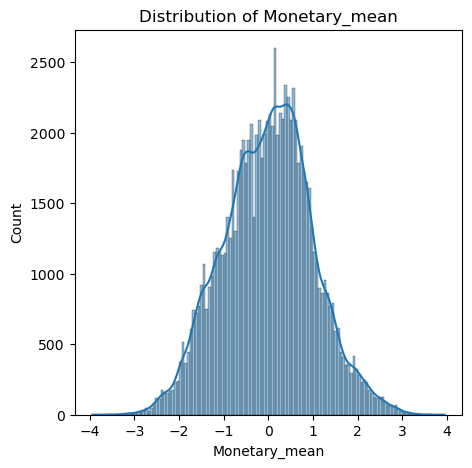

In [58]:
# improve skew
sec_skew_df['Recency'] = stats.boxcox(sec_skew_df['Recency'])[0]
sec_skew_df['Frequency'] = stats.boxcox(sec_skew_df['Frequency'])[0]
sec_skew_df['Items_mean'] = stats.boxcox(sec_skew_df['Items_mean'])[0]
sec_skew_df['Monetary_mean'] = stats.boxcox(sec_skew_df['Monetary_mean'])[0]
sec_skew_df['Score_mean'] = stats.boxcox(sec_skew_df['Score_mean'])[0]

# StandardScaler
sec_skew_scaled_df = StandardScaler().fit_transform(sec_skew_df)
sec_skew_scaled_df = pd.DataFrame(sec_skew_scaled_df, columns=sec_skew_df.columns, index= sec_skew_df.index)

check_skew(sec_skew_scaled_df, 'Recency')
check_skew(sec_skew_scaled_df, 'Frequency')
check_skew(sec_skew_scaled_df, 'Score_mean')
check_skew(sec_skew_scaled_df, 'Items_mean')
check_skew(sec_skew_scaled_df, 'Monetary_mean')



## 7. Save DataFrames

In [59]:
df.to_csv('DataFrame.csv', index=False)

In [60]:
RFM_df.to_csv('RecencyFrequencyMonetary_DataFrame.csv')

In [61]:
RFM_skew_scaled_df.to_csv('RFM_skew_scaled_df.csv')

In [62]:
second_cluster_df.to_csv('second_cluster_df.csv')

In [63]:
sec_skew_scaled_df.to_csv('sec_skew_scaled_df.csv')